# Certificate in Data Science | Milestone 1 |  
- Independent Project

> University of Washington  
> August 2019  
> N. HICKS

---
## Instructions

1. ***Generate a clear problem statement, and provide the location for the dataset used.***
2. ***Visually explore the data to generate insight and include summary statistics.***
3. ***Provide a clear solution to the problem for a non-technical audience.***  
   ***(Explain which aspects are important, and why.)***
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables
  
Note:  
1. Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.  
2. The bolded items (above) indicate the milestone objectives of most interest, per the [Instructions](https://startlearning.uw.edu/courses/course-v1:UW+DATASCI410+2019_Winter/courseware/20659760e6504409ace174ccaa96df89/d34173f9caee49dd8cf54784f26b3c35/?child=first).
  
---

# Abstract  
The King County housing dataset reflects data derived from housing surveys conducted between May 2014 and May 2015.  The dataset contains 19 features describing various aspects of a housing unit that might reflect redeeming qualities effecting resale value.  Approximately 22,000 samples are made available herein for analysis.

# Problem Statement
As a housing construction contractor it is critical to achieve profit for every home sales opportunity. In this way, the need exists to identify those housing unit features that help to drive profit increase for every home property sale and / or renovation.

# Conclusion  
The King County Housing dataset is very informative when evaluated through the various visualization techniques. Several important factors are shown to correlate with the purchase price of a home. Initially, box plots are derived to reflect the dataset distributions. Where the various categories are directly related, such as when a boxplot gives a breakdown of the number of bathrooms or bedrooms within a home, the interpretation can easily be made as to which values are prominent.  
  
- A single KDE plot is given, that shows an increasing linear trend for comparing the total square footage as a function of the purchase price.  
- Scatter plots are given to support the box plot results, that simply show another perspective of the underlying dataset.  
- Hexbin plots are shown as a more granular view of the data, where the binning process gives a higher level viewpoint therein.  
- Heatmap plots are demostrated against several of the features giving yet another high level approach to interpretting this dataset.  
  
# Document Overview  
   - Various visulizations are given below that observe how Purchase Price is correlated with the other dataset features.
   - Explanations regarding such feature importances are provided beneath each of the figures.
   - Python 3 code, with comments, are employed to develop these results.

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Negate the UserWarnings notifications
import warnings
warnings.filterwarnings("ignore")

# Locate and Import the Dataset

In [3]:
# retrieve the prescribed dataset
def fetch_data(file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(file)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        file = 'C://Users//NateDogg//Desktop//_notebooks//kc_house_data.csv'
        print('LOCAL FILE USED; REMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)')
        # import the file to a dataframe
        _df = pd.read_csv(file)
    return _df


# Cleaned up Dataset location
filename = 'https://library.startlearninglabs.uw.edu//DATASCI410//Datasets//kc_house_data.csv'
housing_df = fetch_data(filename)
# Provide initial summary statistics
housing_df.describe()

LOCAL FILE USED; REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)


id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## ***Initiate EDA Derivations***

In [7]:
# change the data type from 'float' to 'int', for improving data visualization
housing_df['price'] = housing_df['price'].astype('int64')
# change the data typpe from 'object' to 'date/time'
housing_df['date'] = pd.to_datetime(housing_df['date'])
# Display the data types and categories within the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.5 MB


In [ ]:
# Display first 10 entries of the dataframe
housing_df.head(10)

In [ ]:
# Display last 10 entries of the dataframe
housing_df.tail(10)

In [ ]:
# update the Jupyter Notebook theme via command line:
#! jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

# define a function to update this notebooks theme parameters
def updateTheme(figArea):
    try:
        from jupyterthemes import jtplot
        # choose which theme to inherit plotting style from:
        # onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
        themeChoice = 'onedork'
        jtplot.style(theme=themeChoice)

        # set "context" from:
        # paper | notebook | talk | poster
        # scale font-size of ticklabels, legend, etc.
        # remove spines from x and y axes and make grid dashed
        jtplot.style(context='notebook', fscale=1.6, spines=False, gridlines='--')

        # turn on X- and Y-axis tick marks (default=False)
        # turn off the axis grid lines (default=True)
        # and set the default figure size
        jtplot.style(ticks=True, grid=False, figsize=figArea)

        # Set the palette using the name of a palette:
        # deep | muted | pastel | bright | dark | colorblind
        sns.set_palette("pastel")

    except ImportError:
        pass

In [9]:
# set the boxplot marker specification
markerType = dict(marker='s', markeredgecolor='black', markerfacecolor='g', markersize=6)
# define the area of the resultant plots
figArea = (25, 15)
# update the notebook theme parameters
# updateTheme(figArea)

# Initiate Visualization Outputs

> ### Box Plots

In [14]:
# establish plot output / visualizations
%matplotlib inline
sns.set()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

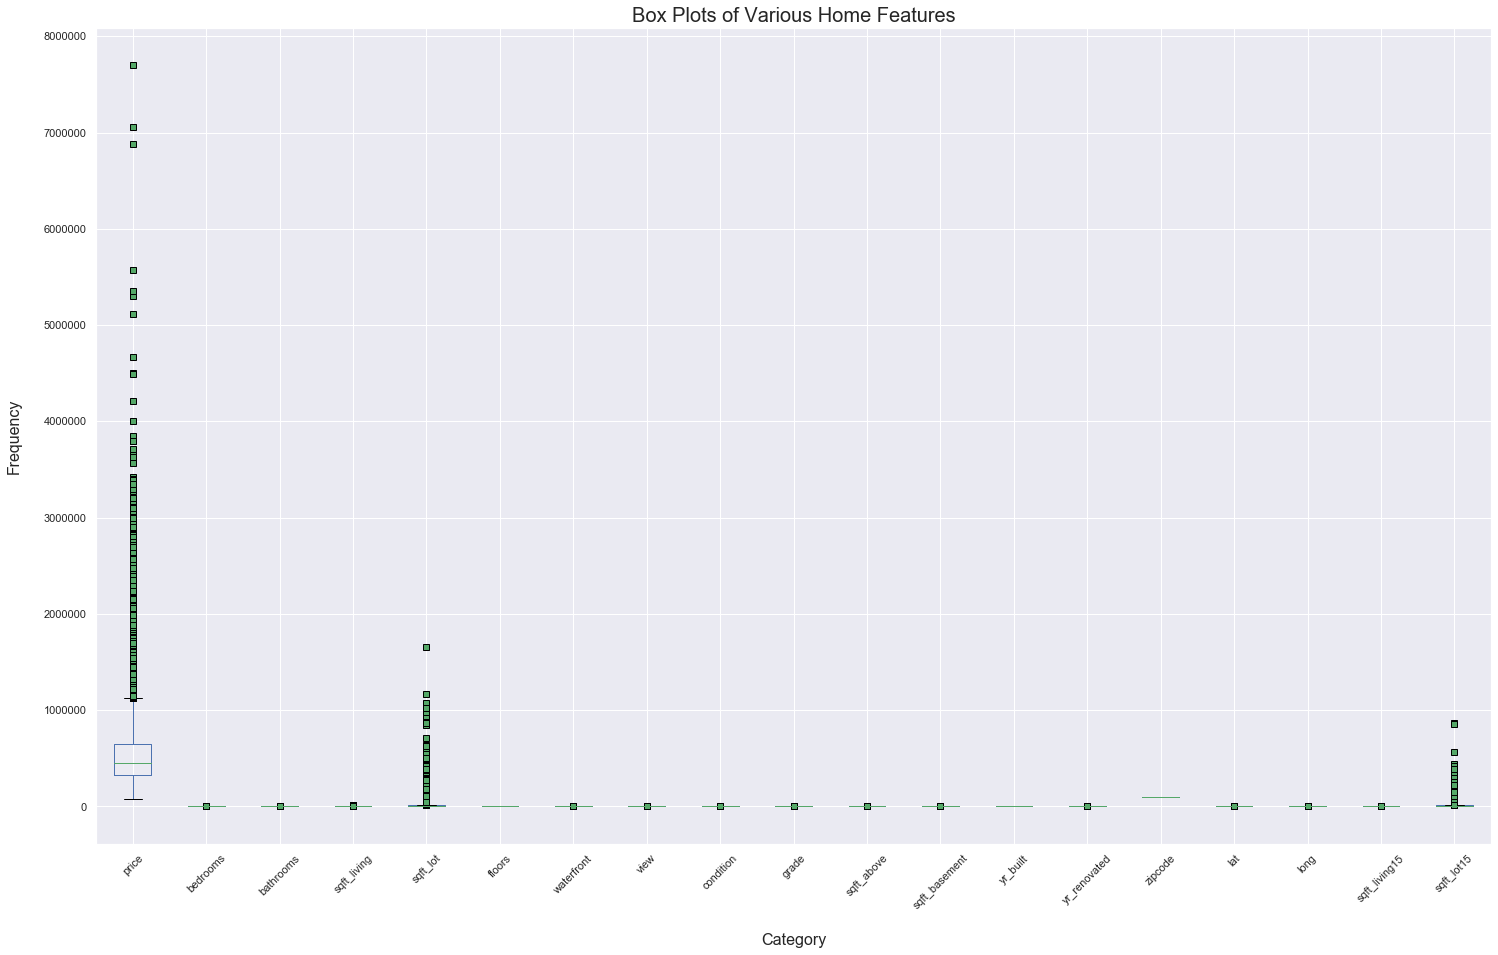

In [20]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
df = pd.DataFrame()
features = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view",
            "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode",
            "lat", "long", "sqft_living15", "sqft_lot15"]
# features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
#             "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode",
#             "lat", "long", "sqft_living15"]
housing_df.loc[:,features].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nCategory', fontsize=16)
plt.xticks(rotation=45)

>> 1. The distributions above show which features have the largest frequency of occurances amongst all features.  
>> 2. The most noticeable distributions are those with the largest magnitudes as their unit of measure, i.e. 'price' is larger than 'floors'.
>> 3. Therefore, the features can not directly be compared for similarity.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

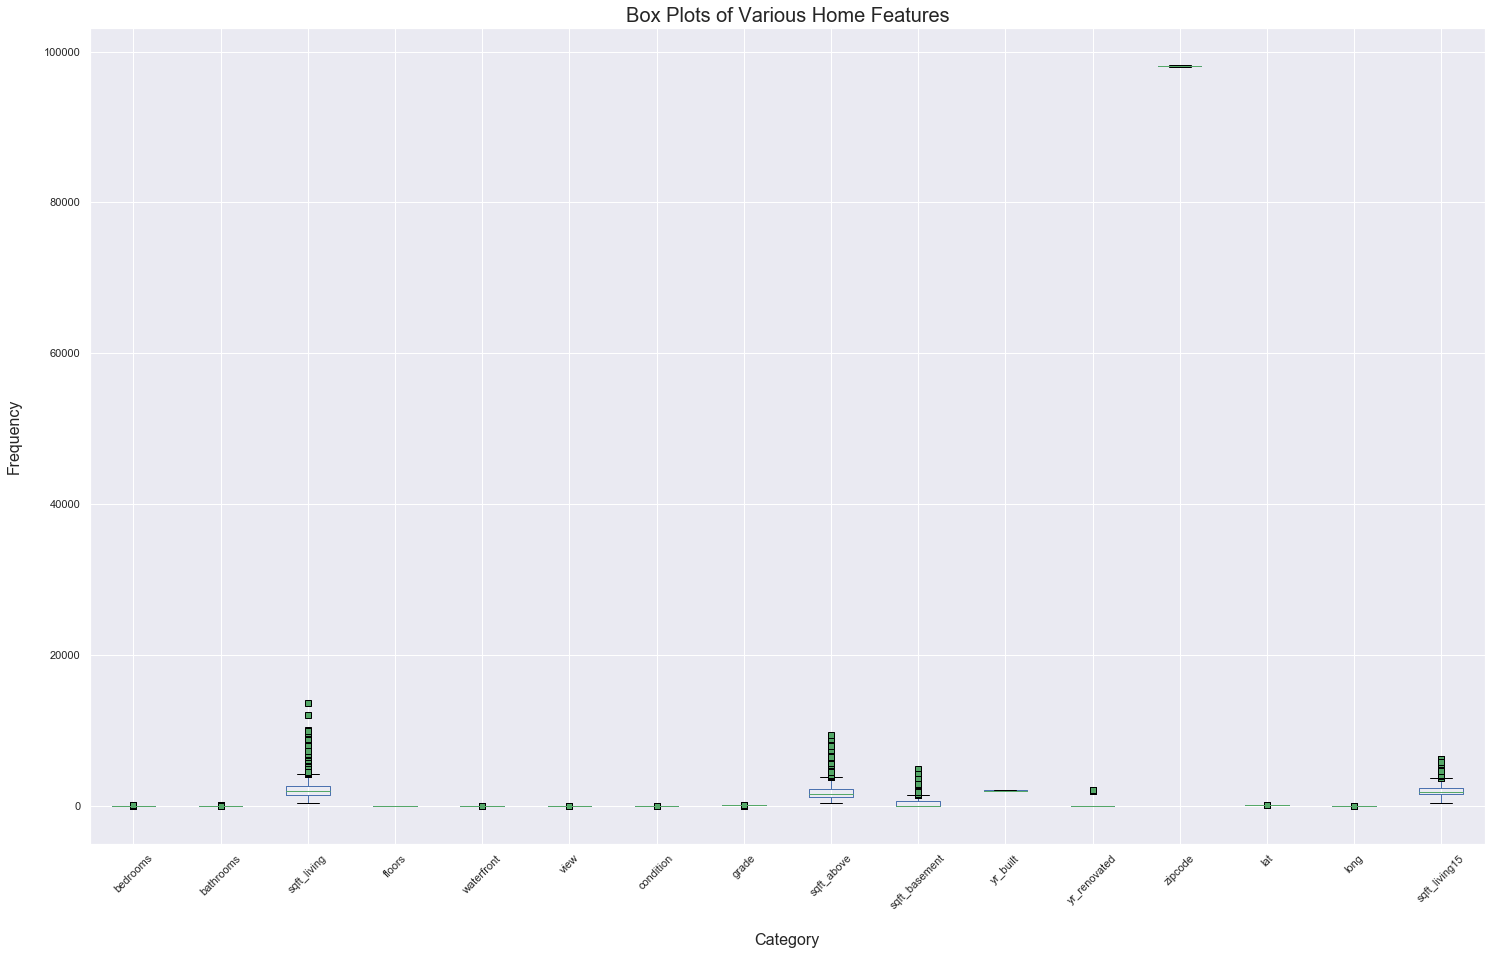

In [21]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
           "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode",
           "lat", "long", "sqft_living15"]].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nCategory', fontsize=16)
plt.xticks(rotation=45)

>> 1. After removing the larger spread of distrubitions as shown above, the next set of distributions results.
>> 2. Recall the magnitude of the measure of units dominates this plot, and the features can not directly be compared for similarity.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

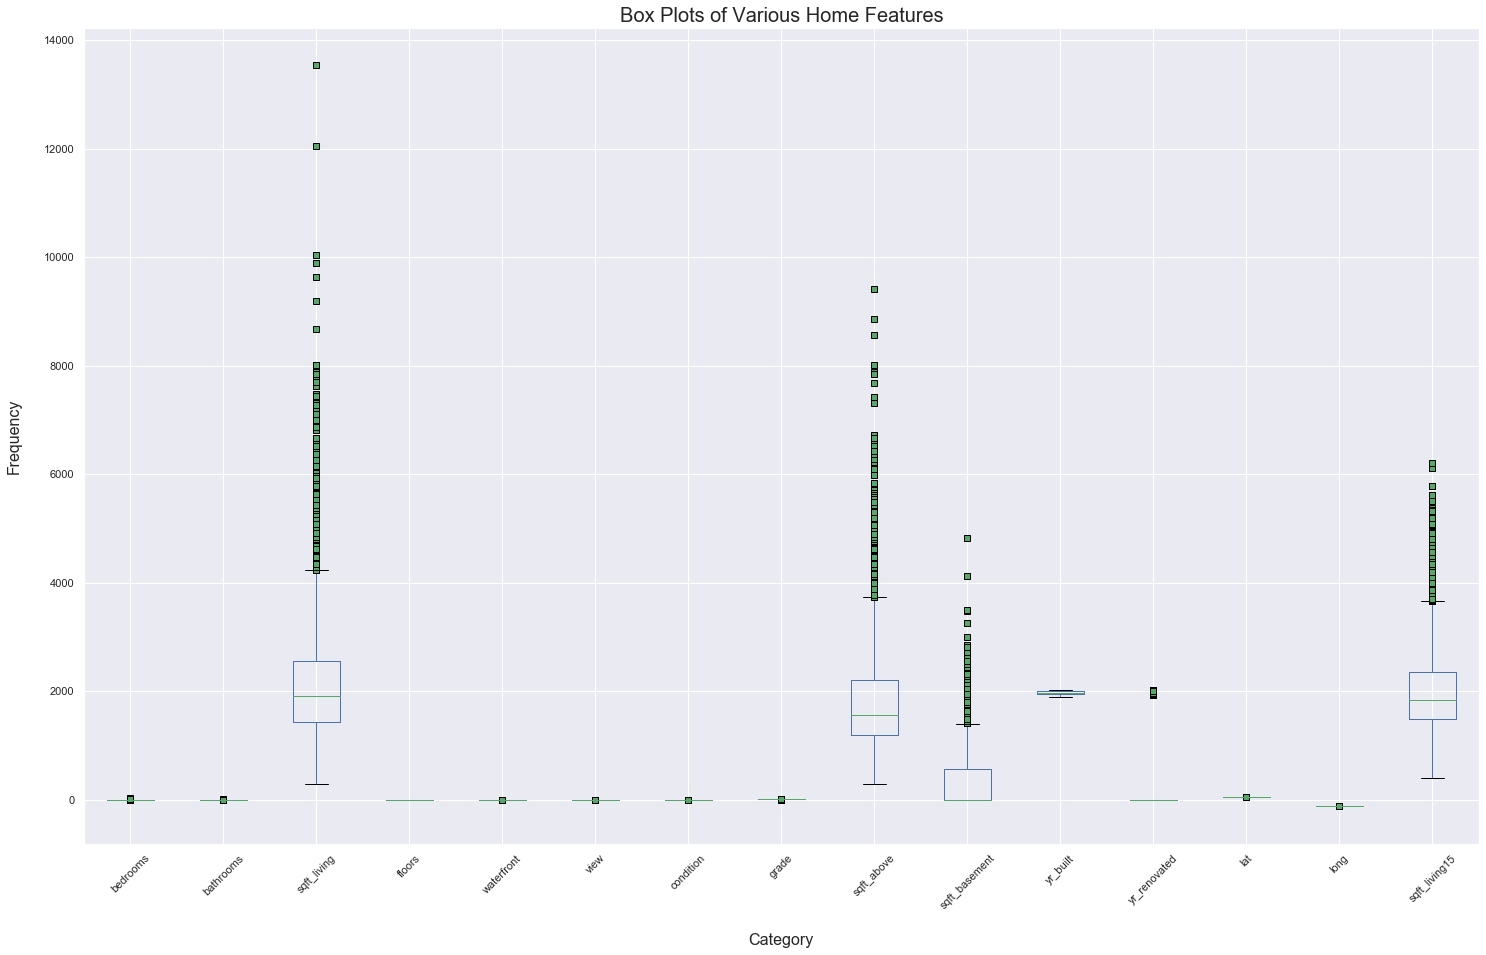

In [22]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
           "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
           "lat", "long", "sqft_living15"]].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nCategory', fontsize=16)
plt.xticks(rotation=45)

>> 1. By once again removing the larger of the distributions from the previous plot, a higher resolution of detail results for those features that remain.
>> 2. Here, the various aspects of square footage are easily compared.
>> 3. This plot suggests the 'yr_built' feature contains data for the year '2000'.

(array([1, 2]), <a list of 2 Text xticklabel objects>)

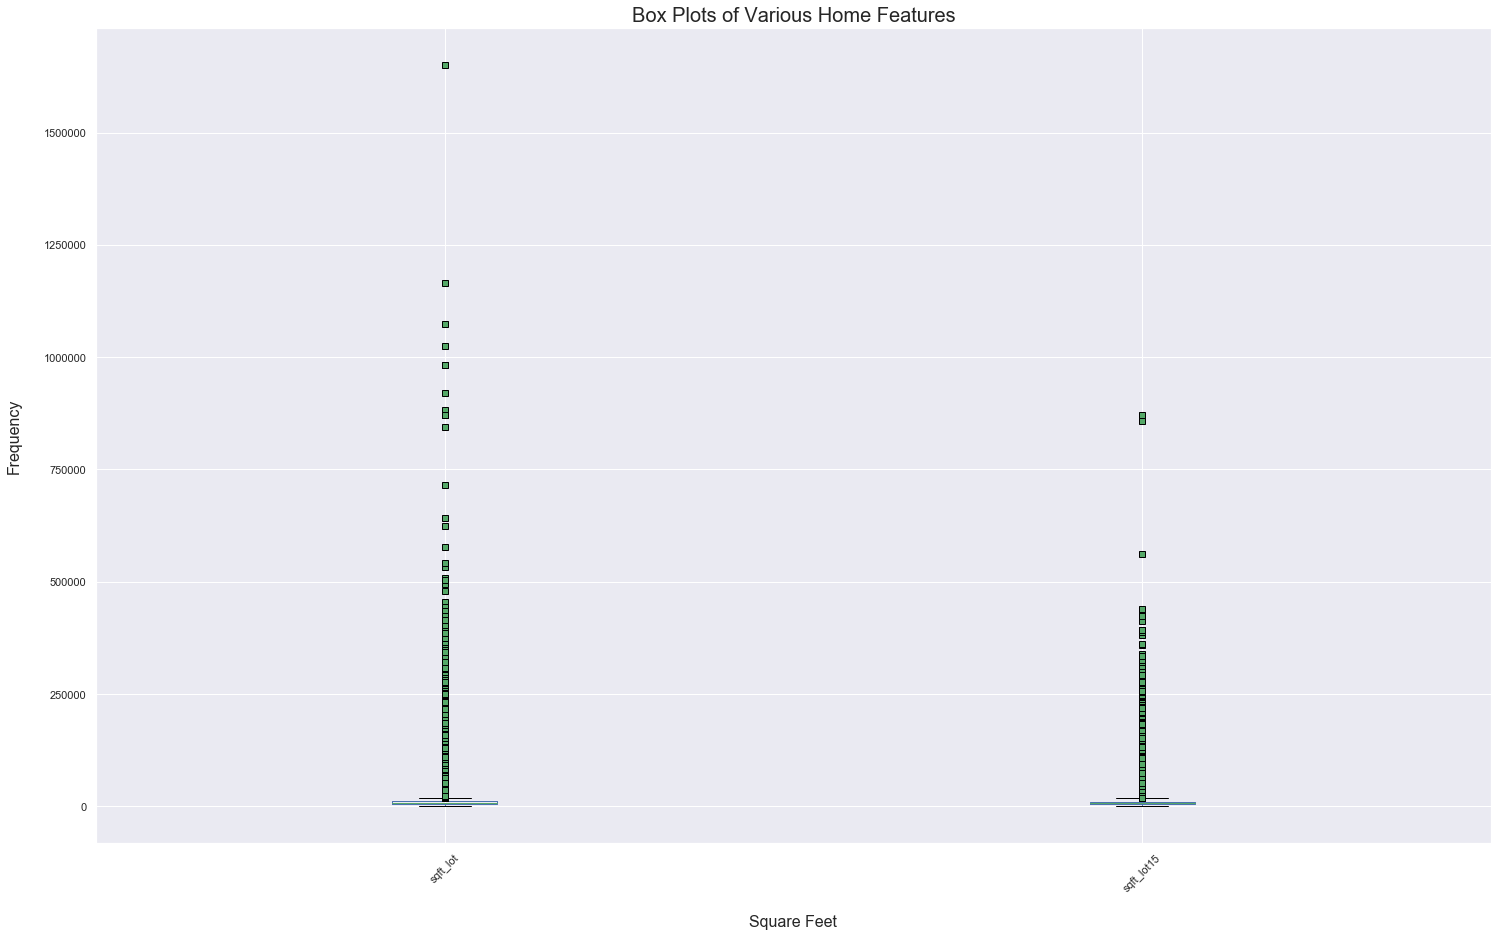

In [23]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['sqft_lot', 'sqft_lot15']].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nSquare Feet', fontsize=16)
plt.xticks(rotation=45)

>> 1. A simple comparison between lot sizes purchased and those lot sizes of nearby neighboring properties.
>> 2. The result suggests that the mean of property sizes are approximately equal.
>> 3. However, the purchased lot size, 'sqft_lot', has a larger distribution than does the 'sqft_lot15' feature.

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

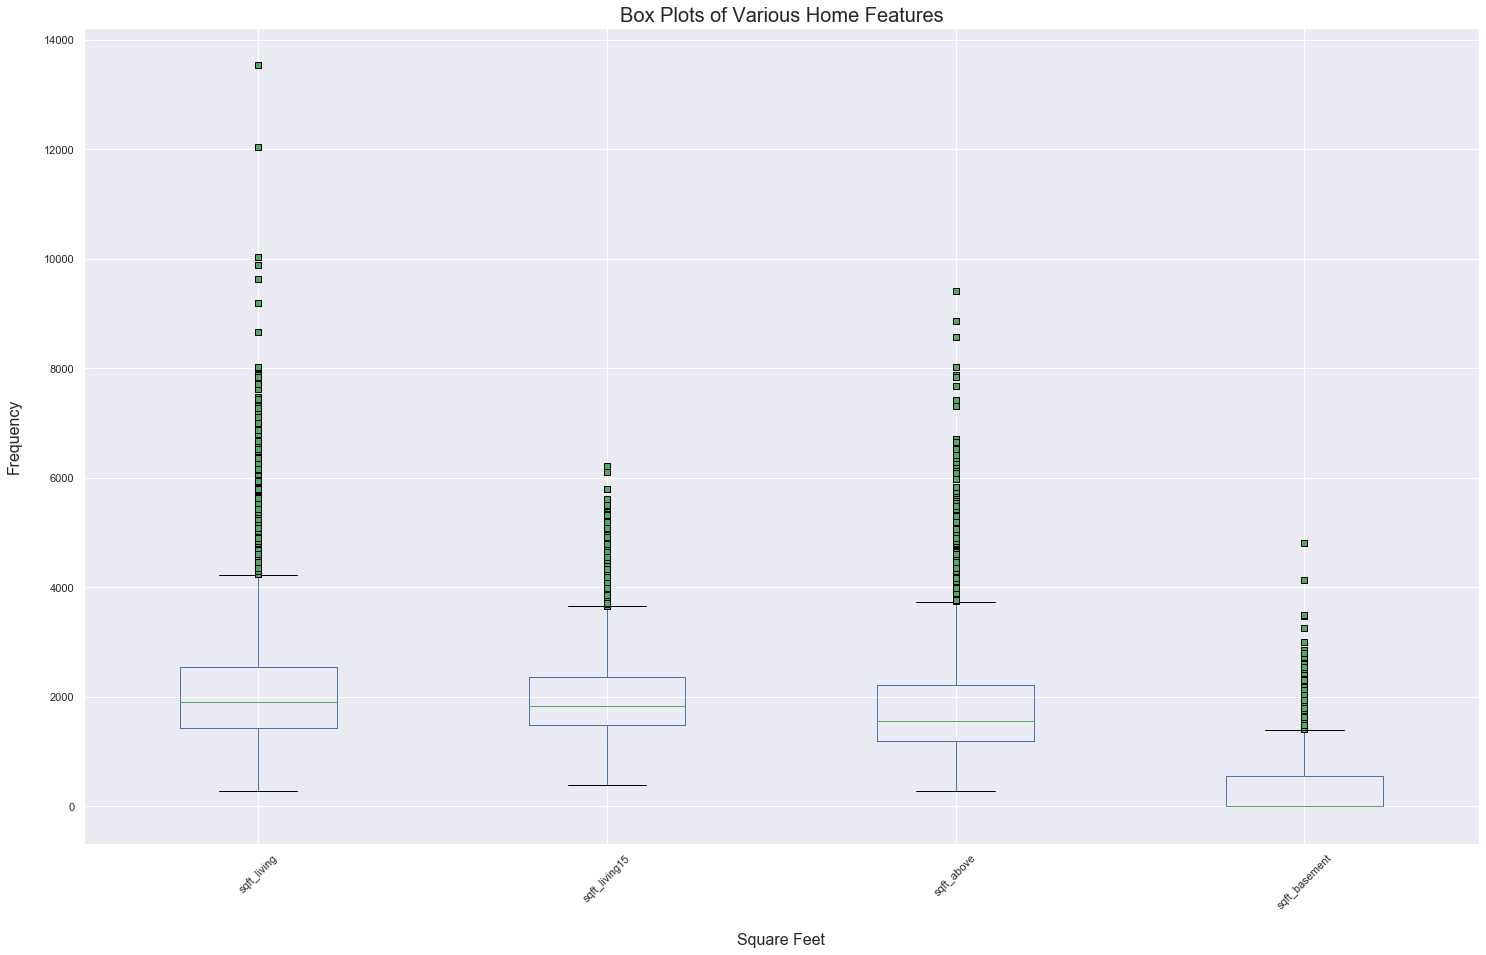

In [24]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement']].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nSquare Feet', fontsize=16)
plt.xticks(rotation=45)

>> 1. The interior living space in square feet is compared to show which of the features gives the higher purchase price.
>> 2. From the results above, it is shown that the homes purchased were slightly larger than the neighboring properties.
>> 3. Also, a majority of the purchased homes have above-ground living spaces, as compared to having a basement space.

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

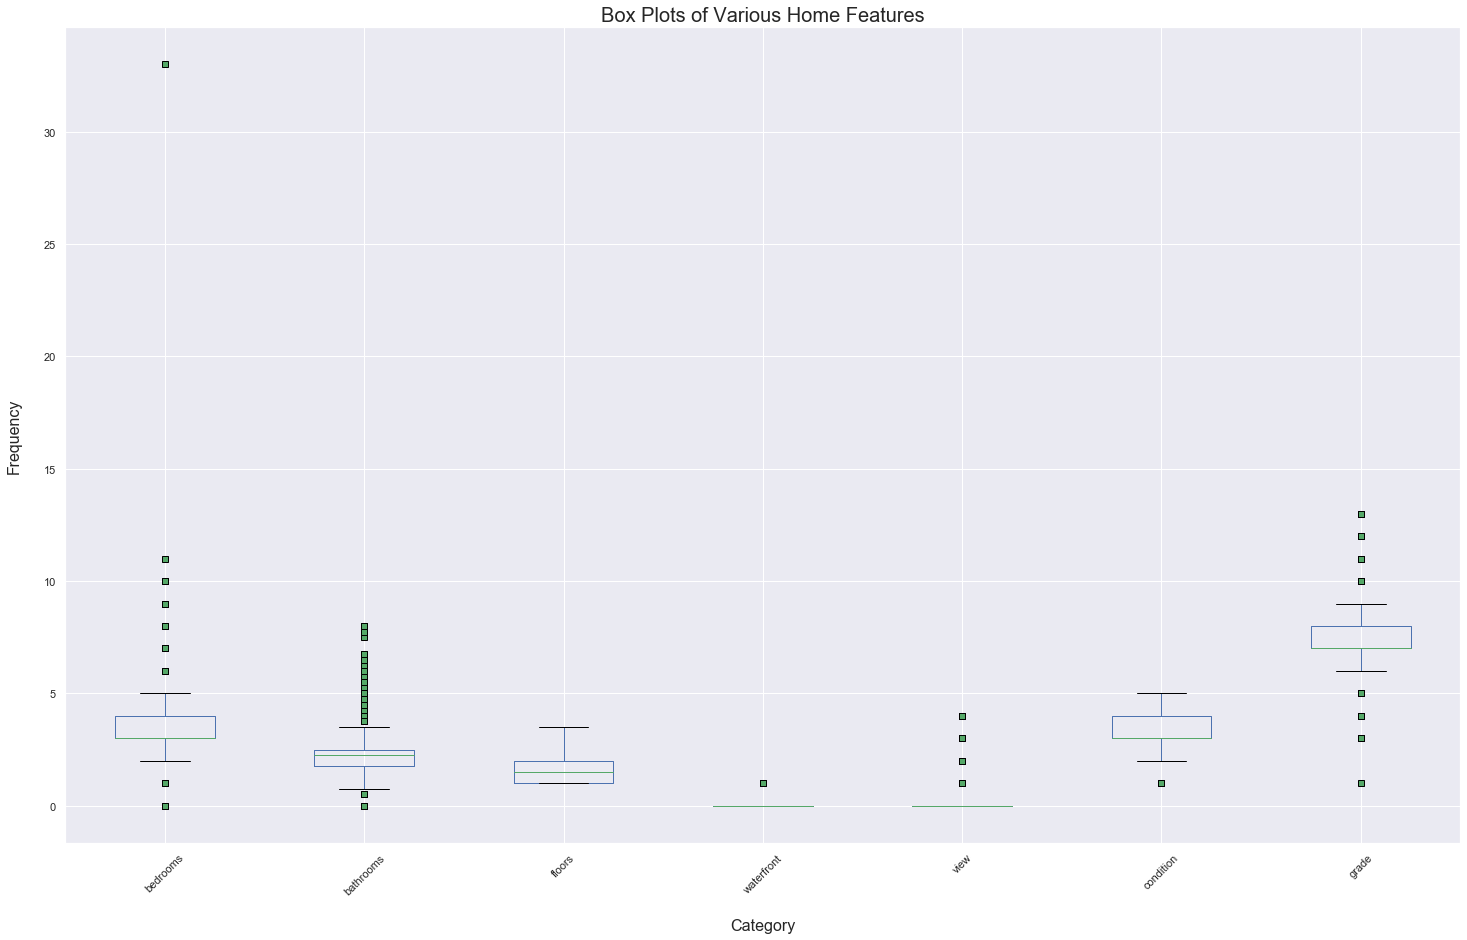

In [25]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,["bedrooms", "bathrooms", "floors", "waterfront", "view",
           "condition", "grade"]].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of Various Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nCategory', fontsize=16)
plt.xticks(rotation=45)

>> 1. Finally, after sequentially removing the larger distribution features, the remaning (above) have the same unit of measure, in that each of these use low-valued integers.
>> 2. We observe that: Home purchases typically have more bedrooms than bathrooms, more bathrooms than floors, and typically the purchases do not have a view.
>> 3. The remaining comparison shows that the grade (quality) of house construction is overall larger than the condition of the house, although, the scales of the 2 features are not identical.

Text(0.5, 0, '\nHousing Score')

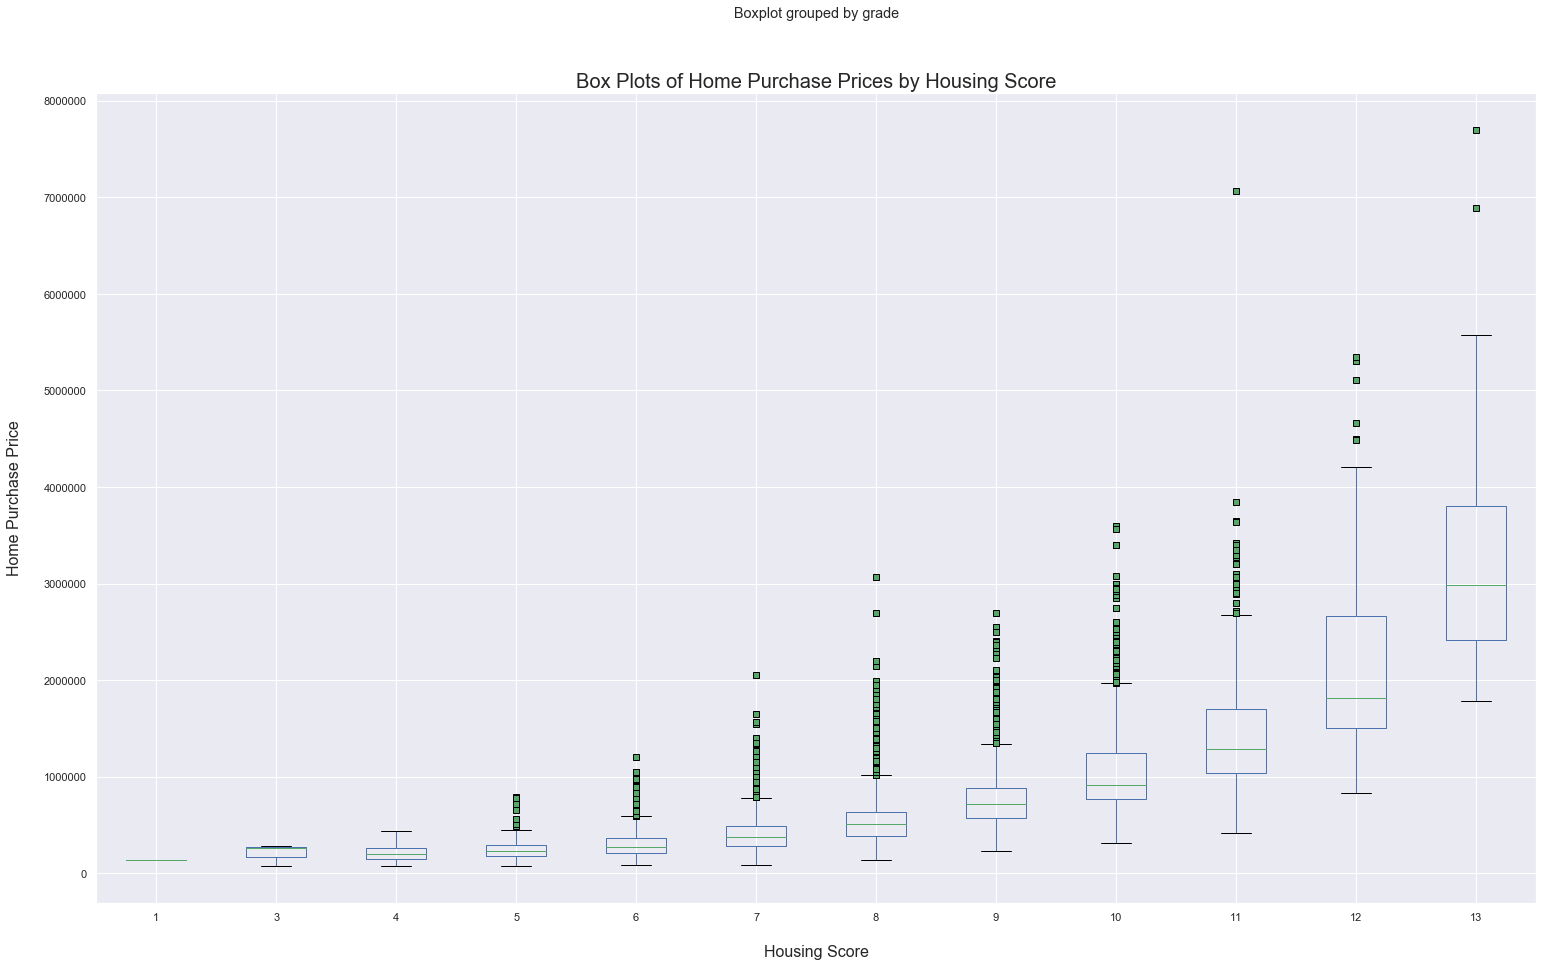

In [26]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'grade']].boxplot(by='grade', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Housing Score', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nHousing Score', fontsize=16)

>> 1. The house 'grade' feature, or the score, is shown to increase non-linearly with the purchase price of the house.
>> 2. Between a score of 5 and 11, are the widest spread in distribution of each feature. 

Text(0.5, 0, '\nHome Condition')

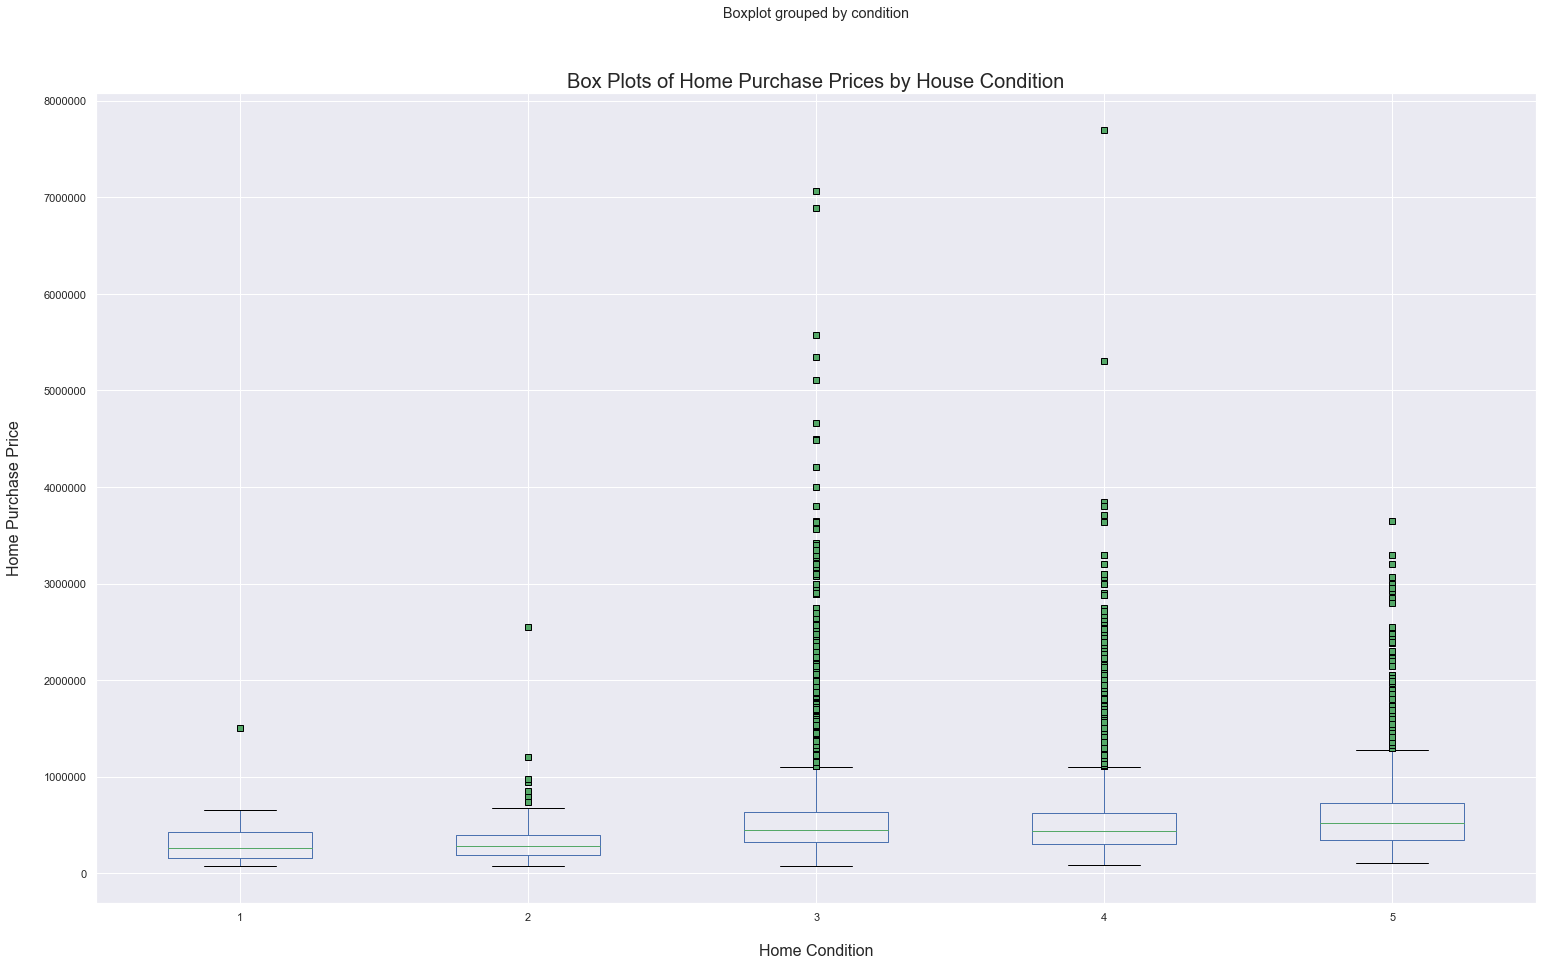

In [27]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'condition']].boxplot(by='condition', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by House Condition', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nHome Condition', fontsize=16)

>> 1. The condition of the home, for the prescribed purchases, is nearly the same for conditions 3 to 5, where the distributions themselves do not vary all that much.
>> 2. Conditions 1 and 2 have nearly identical means with nearly no distrubion of outlier data points.

Text(0.5, 0, '\nNumber of Bedrooms')

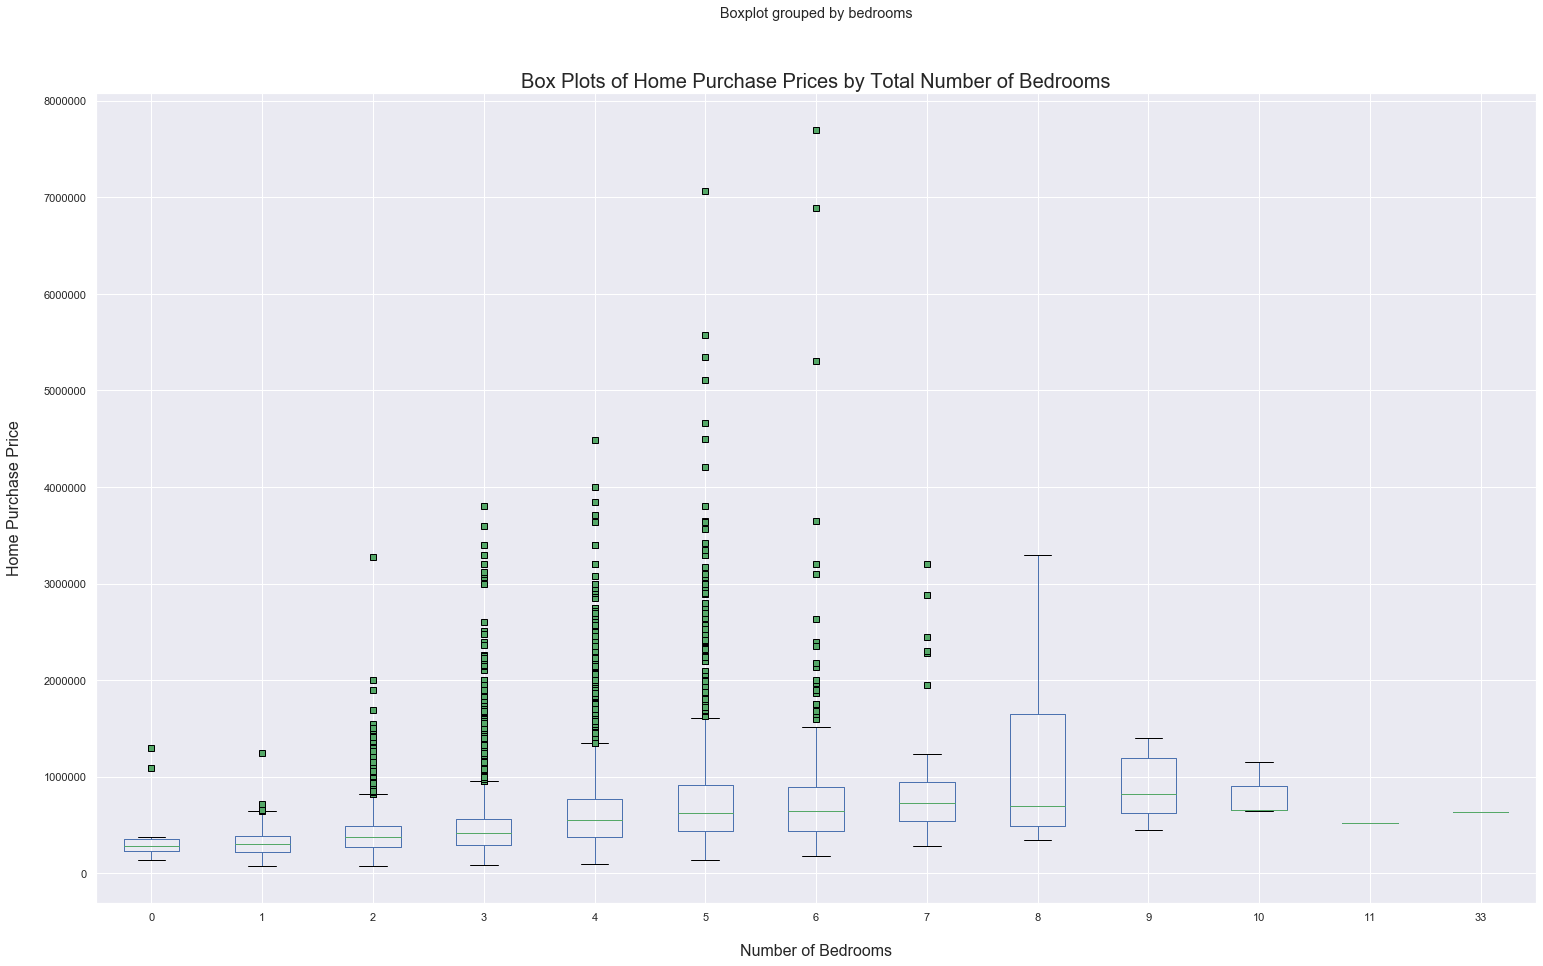

In [28]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'bedrooms']].boxplot(by='bedrooms', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Total Number of Bedrooms', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nNumber of Bedrooms', fontsize=16)

>> 1. By way of the mean values of each attribute for the number of bedrooms, it is seen that the purchase price is nearly linearly increasing.
>> 2. However, for those purchases with bedrooms of 10 or more, the purchase price deviates from this linear behavior.

Text(0.5, 0, '\nSquare Footage')

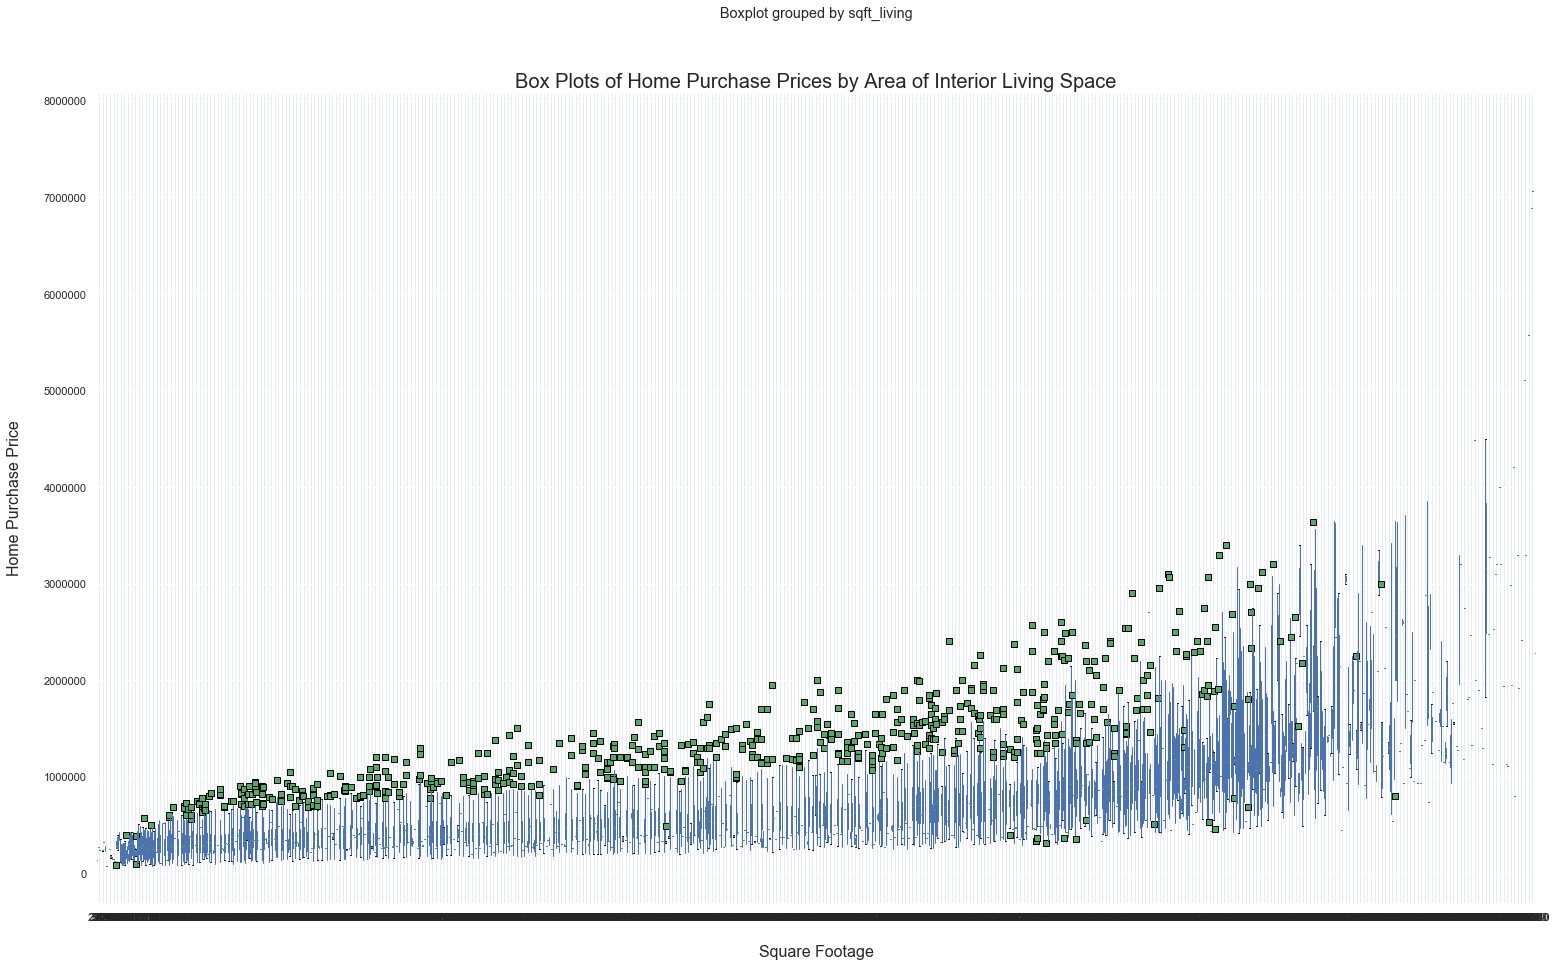

In [29]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
# sns.set_style("whitegrid")
housing_df.loc[:,['price', 'sqft_living']].boxplot(by='sqft_living', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Area of Interior Living Space', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nSquare Footage', fontsize=16)

>> 1. Observation of the nearly linear trend, until the last portion of data, of square footage compared with purchase price.
>> 2. Notice though, that as square footage increases, so also does the variance in outliers.

> ### KDE Plot

Text(0.5, 0, '\nSquare Footage')

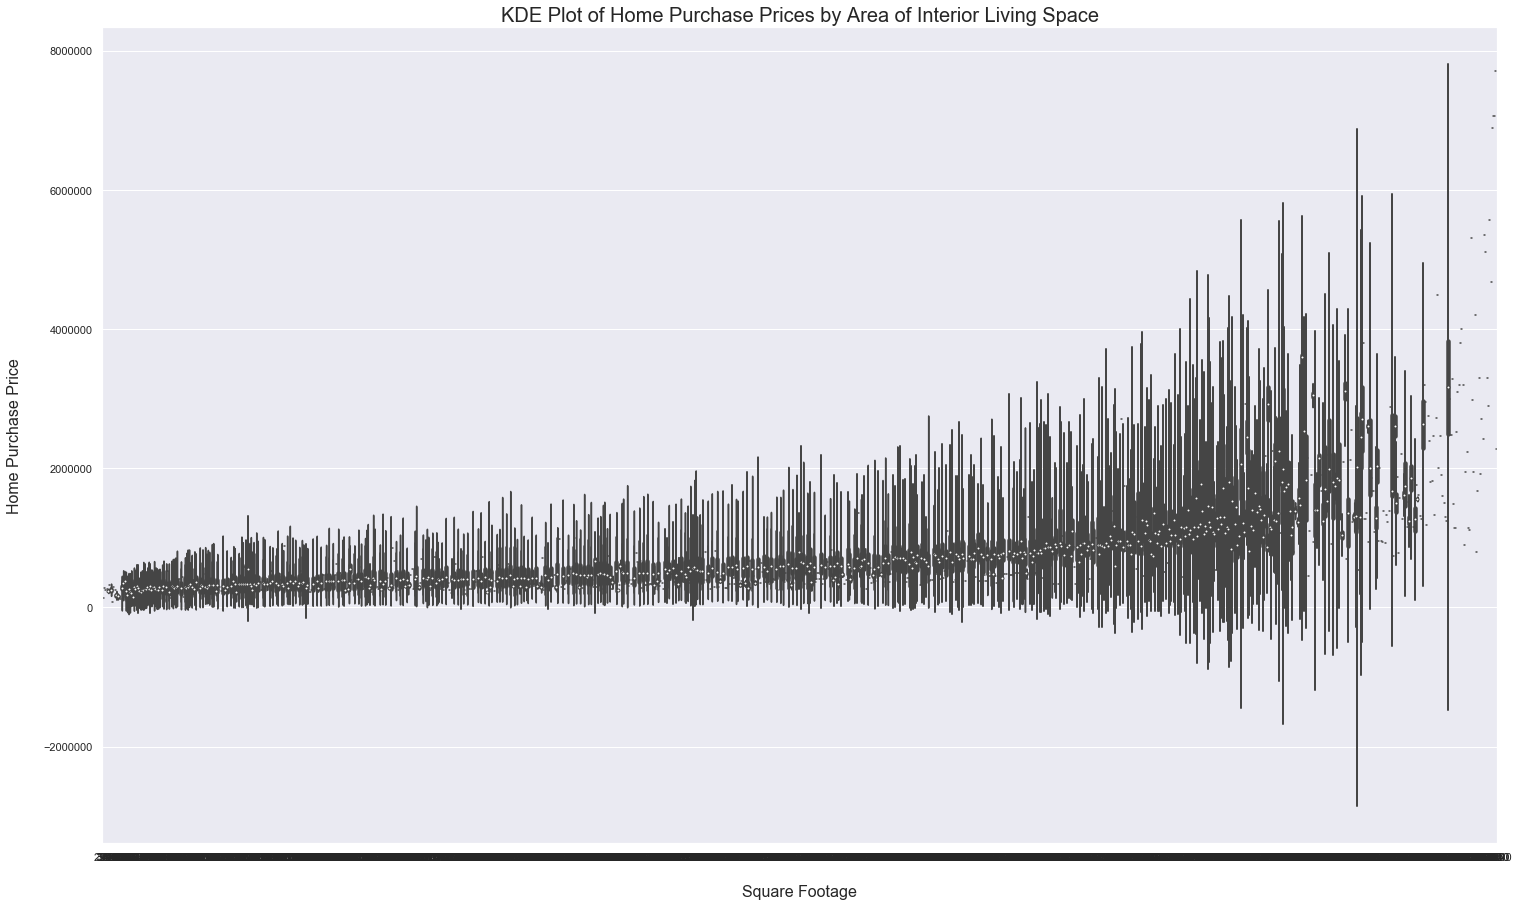

In [30]:
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis 
# sns.set_style("whitegrid")
sns.violinplot(x = 'sqft_living', y = 'price', data = housing_df, ax = ax)
ax.set_title('KDE Plot of Home Purchase Prices by Area of Interior Living Space', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nSquare Footage', fontsize=16)

>> 1. This KDE plot shows in high visibility, the mean of each data point comparing the square footage to purchase price.
>> 2. Same data shown here as the plot above, but now, the interpretatio nis more clear that overall, a linear relationship exists  between the 2 variables of interet.

> ### Box Plots

Text(0.5, 0, '\nNumber of Bathrooms')

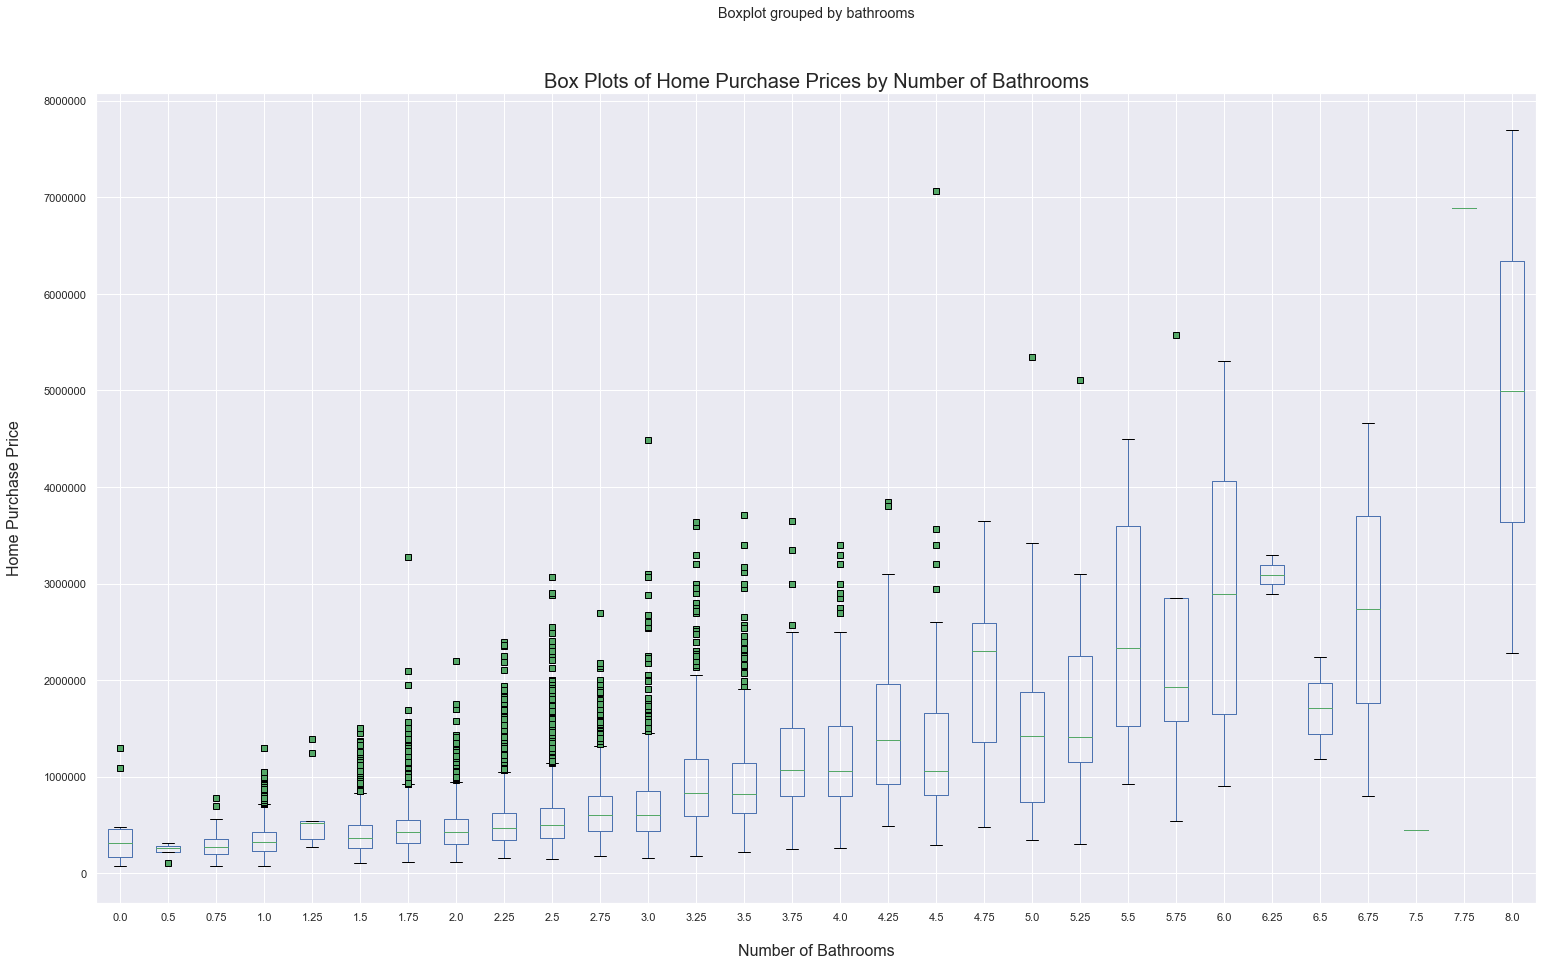

In [31]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'bathrooms']].boxplot(by='bathrooms', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Number of Bathrooms', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nNumber of Bathrooms', fontsize=16)

>> 1. The number of bathrooms compared with the purchased home price indicates a positive linear slope to the data.
>> 2. Notice the spread in outliers for those purchased homes that have between 1.5 and ~3.5 bathrooms.
>> 3. Some home purchases offer premium payout for those with 8 bathrooms.

Text(0.5, 0, '\nNumber of Floors')

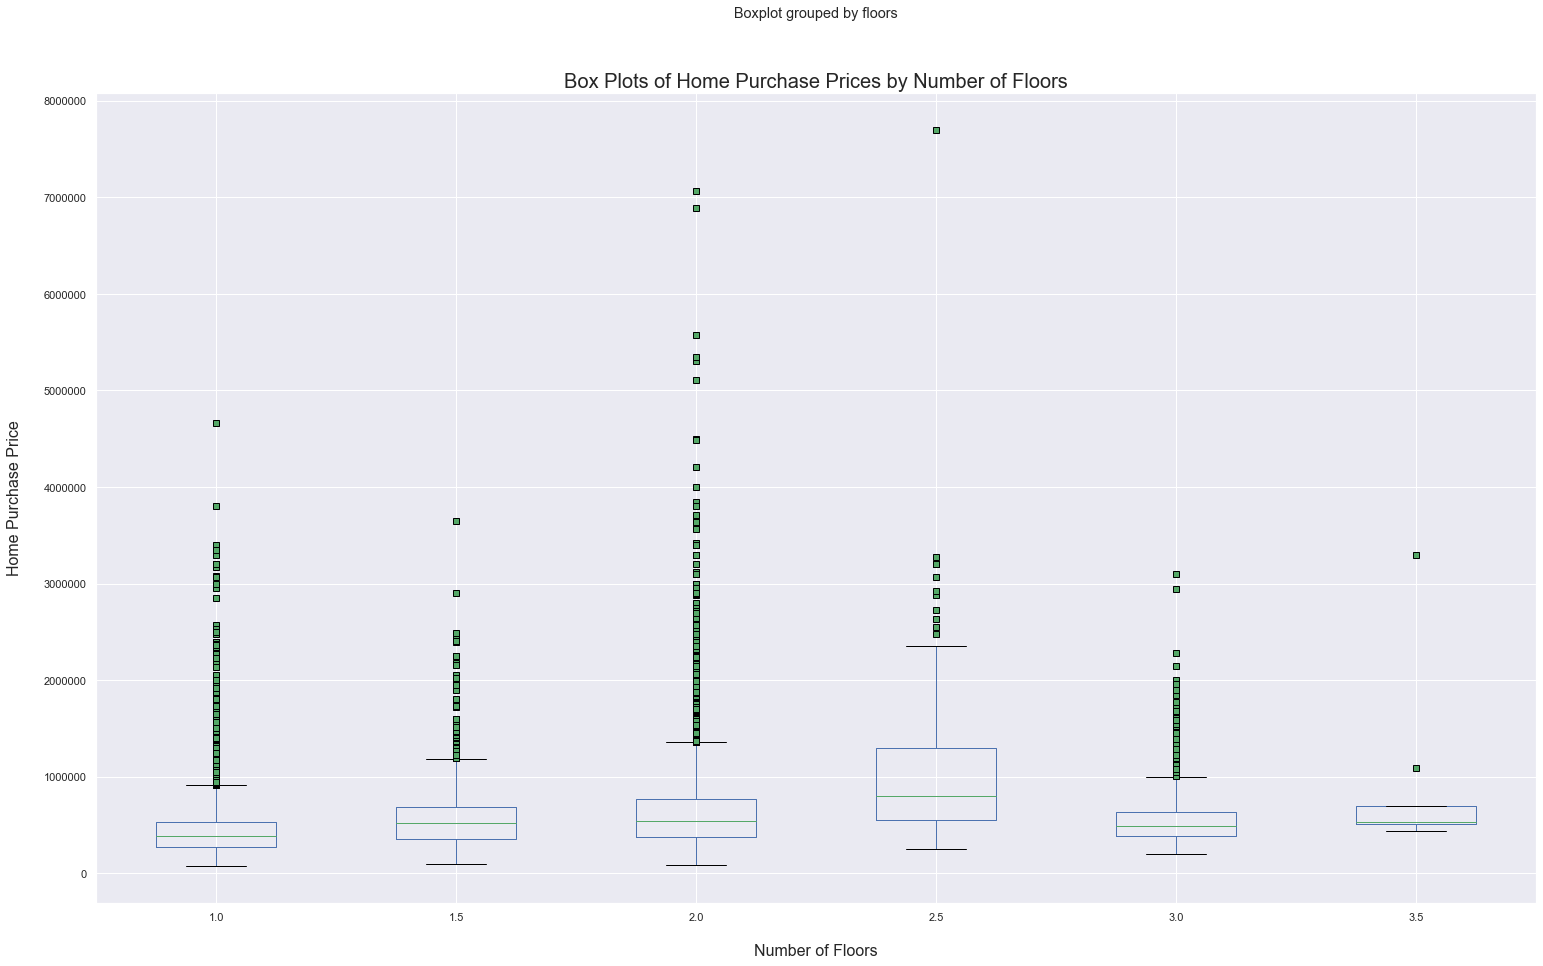

In [32]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'floors']].boxplot(by='floors', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Number of Floors', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nNumber of Floors', fontsize=16)

>> 1. Home purchases with 2 floors offer the largest variance in outlier data points, those constructed with 2.5 floors more often result in higher purchase prices.
>> 2. For those homes with 3.0 or 3.5 floors, the purchase price is comparable to a home with 1.5 or 2.0 floors.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70]), <a list of 70 Text xticklabel objects>)

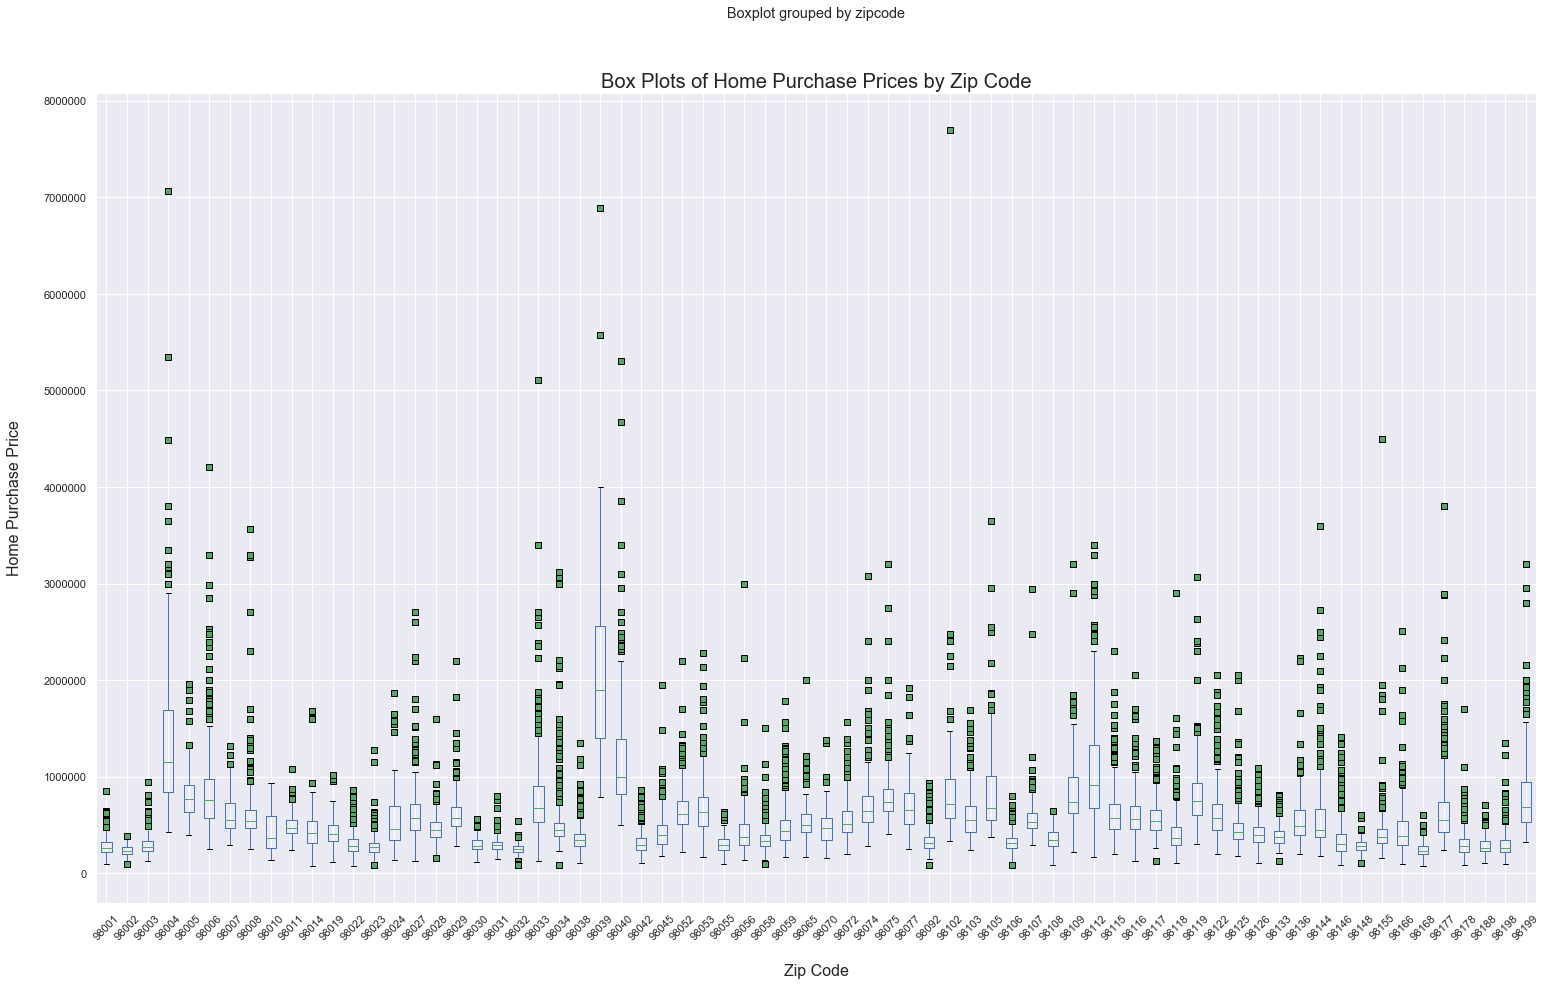

In [33]:
# show distribution characteristics of the dataset
# Method uses plt.boxplot()
fig = plt.figure(figsize=figArea) # Define plot area
ax = fig.gca() # Define axis
housing_df.loc[:,['price', 'zipcode']].boxplot(by='zipcode', flierprops=markerType, ax = ax)
# Set text labels for the figure
ax.set_title('Box Plots of Home Purchase Prices by Zip Code', fontsize=20)
ax.set_ylabel('Home Purchase Price\n', fontsize=16)
ax.set_xlabel('\nZip Code', fontsize=16)
plt.xticks(rotation=45)

>> 1. The highest of zip codes to purchase a home are: 98039, 98004, and 98040.
>> 2. Most other home purchases are shown here to in general not exceed the 1-million dollor range.
>> 3. The purchase prices across the zip codes appears to be ~500,000 dollars.

> ### Correlation Plots

Text(0.5, 1, 'Correlation Matrix of Various Home Features')

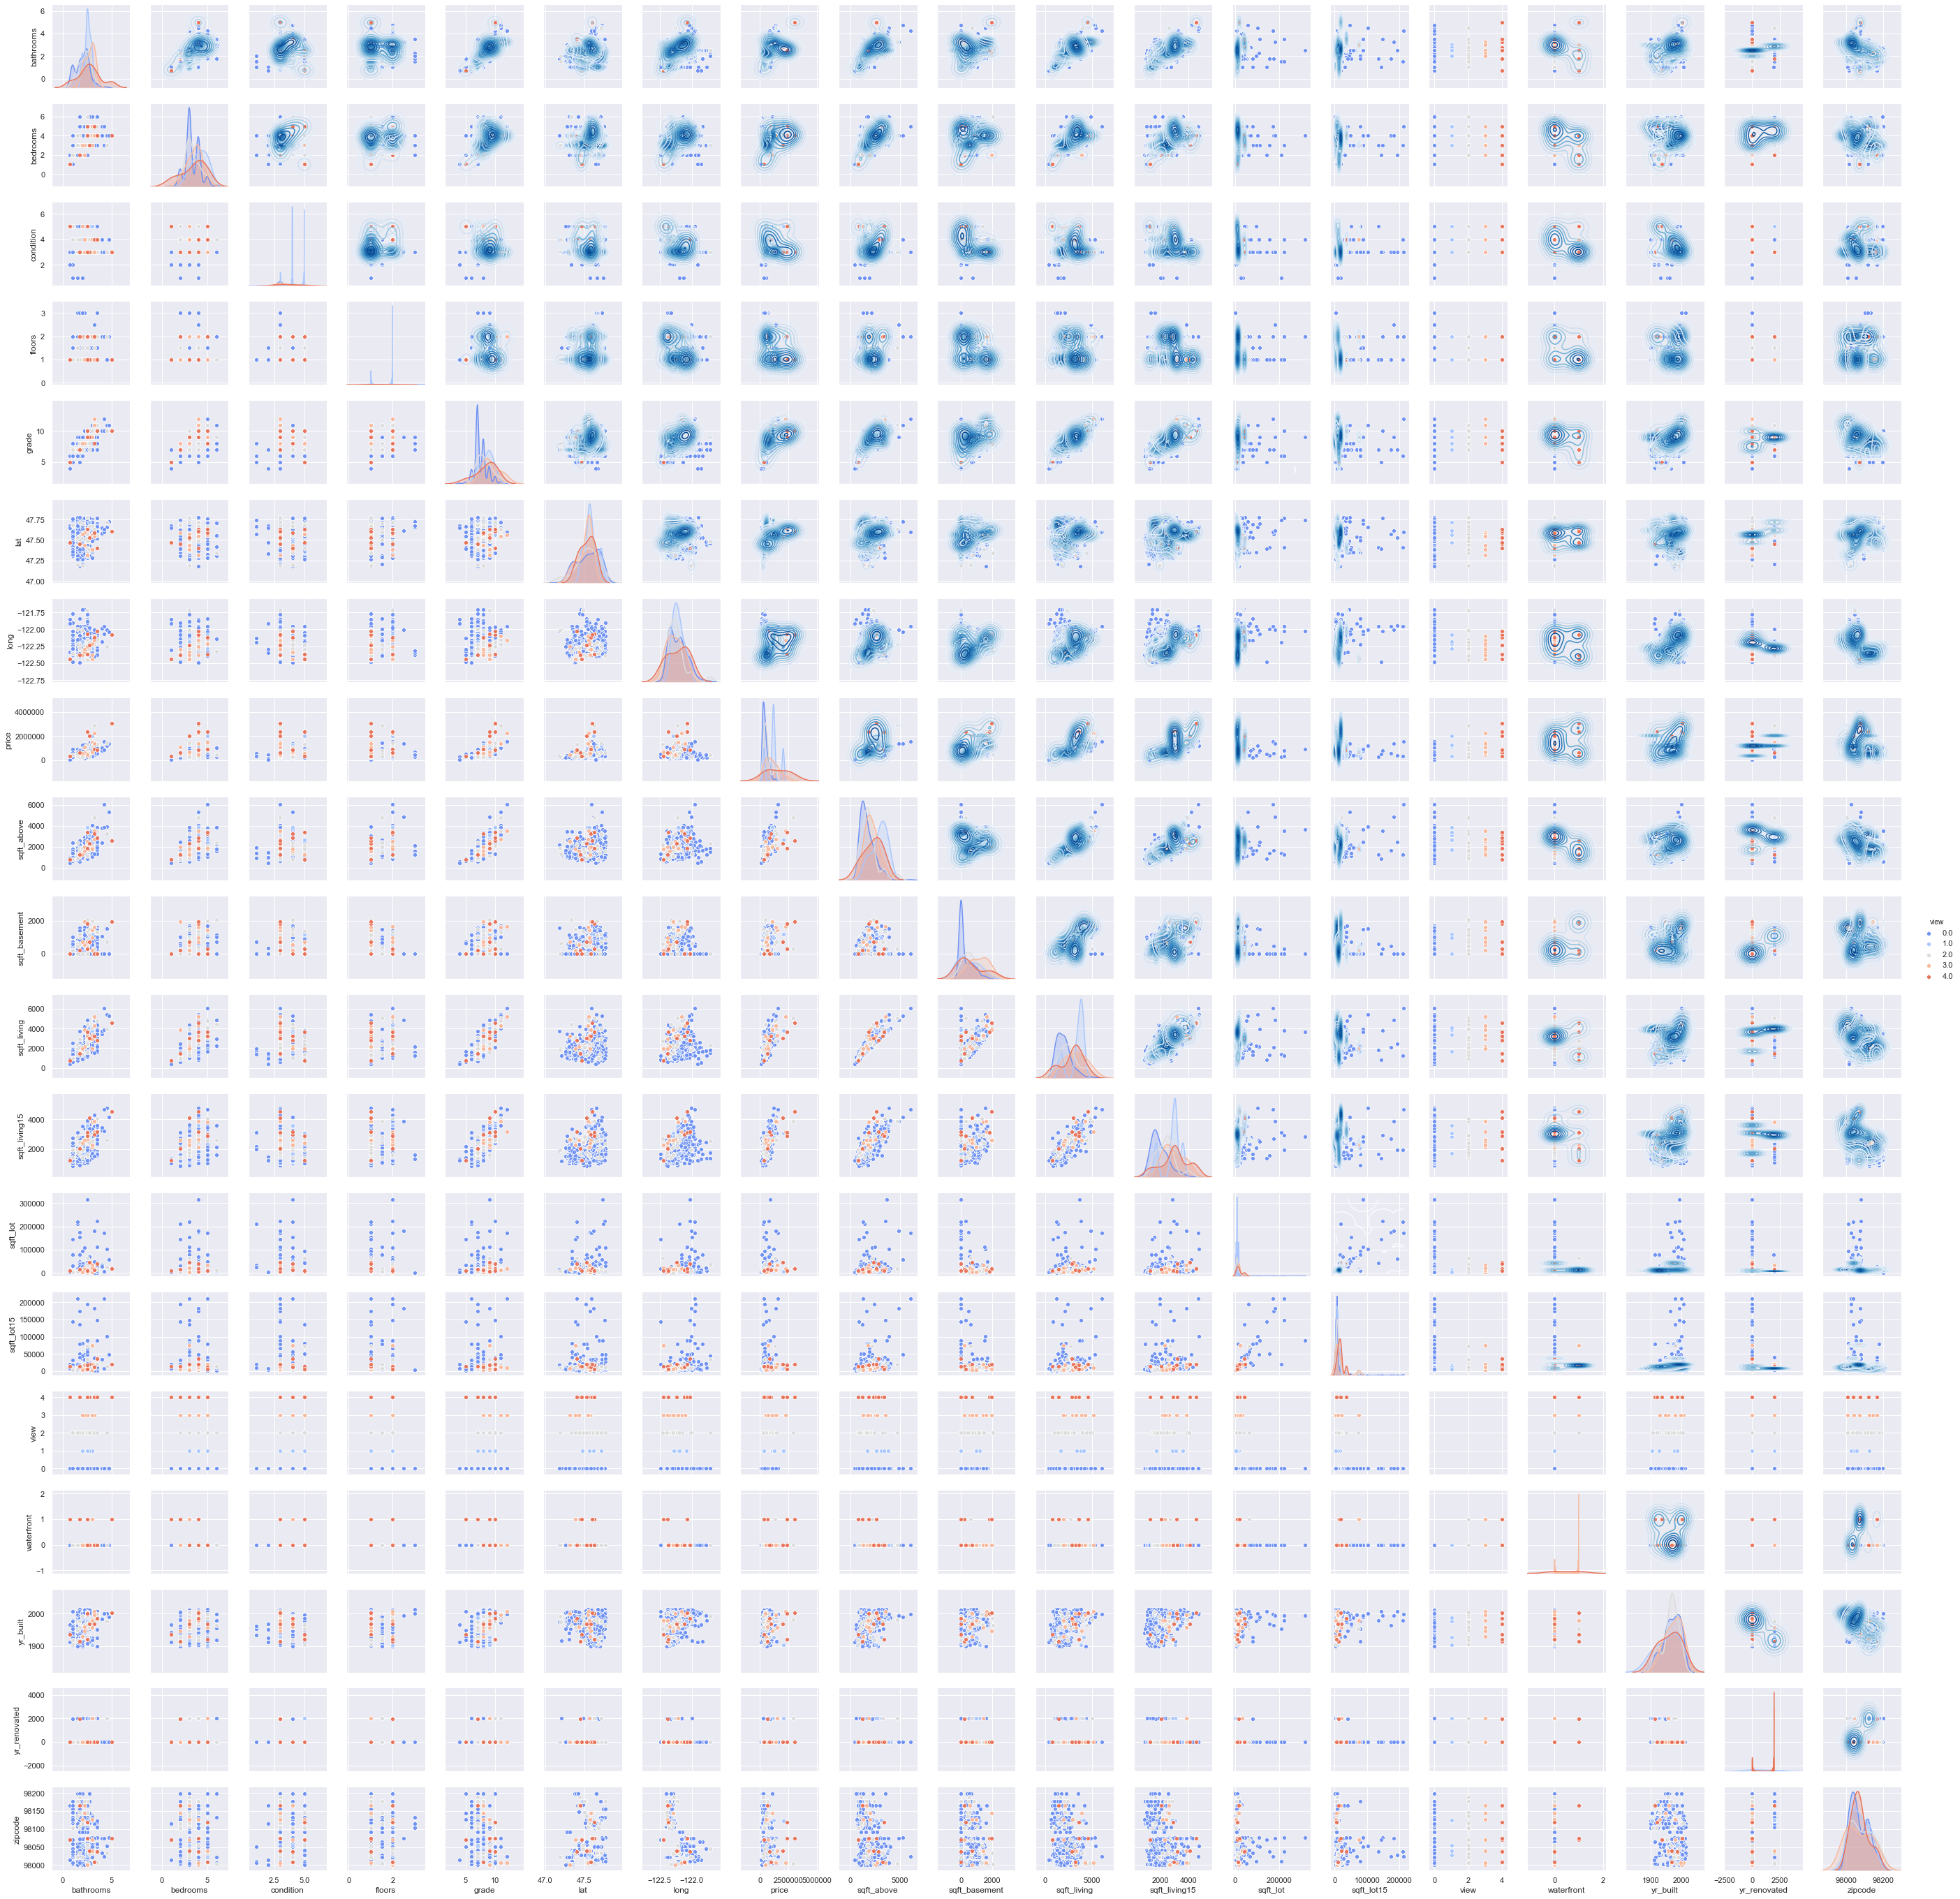

In [34]:
# Gain initial visualization insight to the correlations within the dataset
# Method uses sns.pairplot()
num_cols = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view",
           "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode",
           "lat", "long", "sqft_living15", "sqft_lot15"] 
df = pd.DataFrame()
# randomly select the specified number of datapoints from the primary dataframe
for x in range(500):
    house_df = housing_df.loc[x, num_cols]
    df = df.append(house_df)
sns.pairplot(df, hue="view", palette="coolwarm", diag_kind="kde", 
             height=2, aspect=1).map_upper(sns.kdeplot, cmap="Blues")
ax.set_title('Correlation Matrix of Various Home Features', fontsize=20)

>> 1. The foremost plot result of notice is that a purchased lot is similar in square footage as the neighboring lots, as clearly shown in the upper KDE plot (row 13, column 14).
>> 2. The first 12 features show correlation via the upper KDE plot.
>> 3. Interesting relationships exist between the total square footage and how this total is evaluated into an above-ground and a basement evaluation. 

> ### Facet Plots

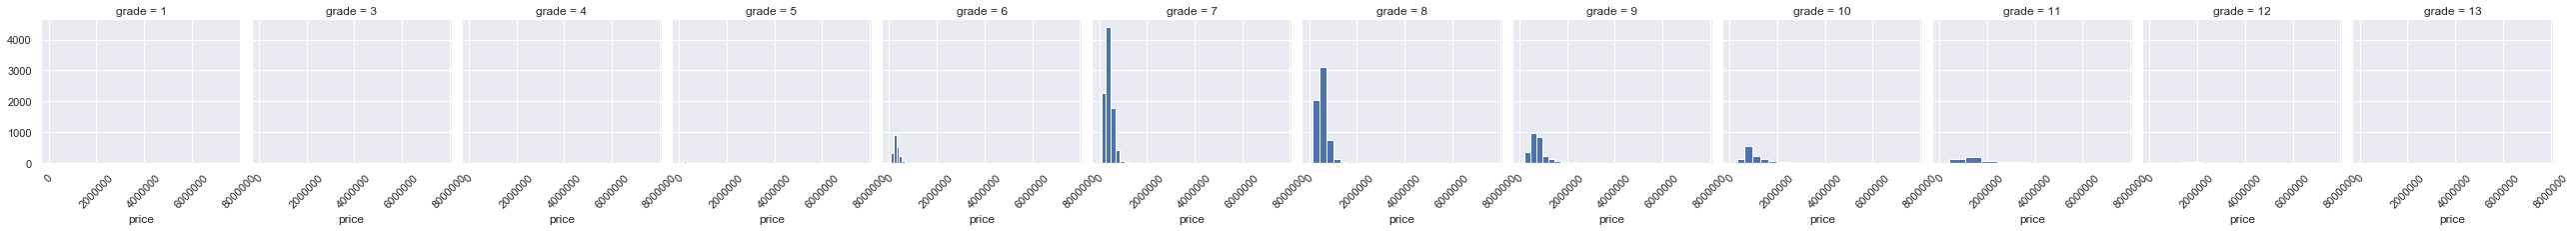

In [35]:
gx = sns.FacetGrid(housing_df, col='grade')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
gx.fig.subplots_adjust(wspace=.05, hspace=.05)

>> 1. The majority of distibuted grade scores amongst the purchased homes are between grade 6 and grade 11.
>> 2. The 2 most frequently purchased homes have a grade of either 7 or 8.

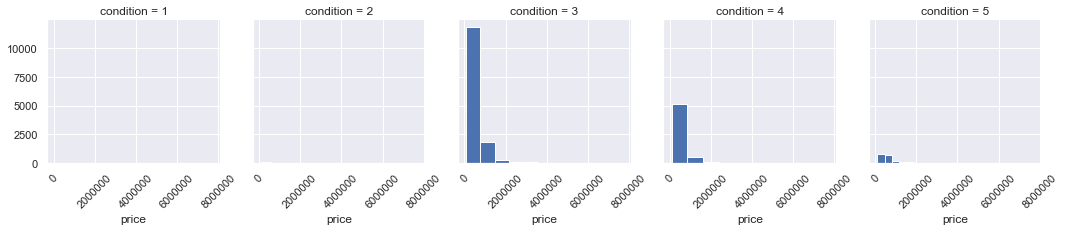

In [36]:
gx = sns.FacetGrid(housing_df, col='condition')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
#gx.set(xlim=(0, 3000000)).fig.subplots_adjust(wspace=.10, hspace=.05)

>> 1. The homes purchased in King County have a condition ratibng of between 2 and 5.
>> 2. The most frequently purchased home condition is a 3.

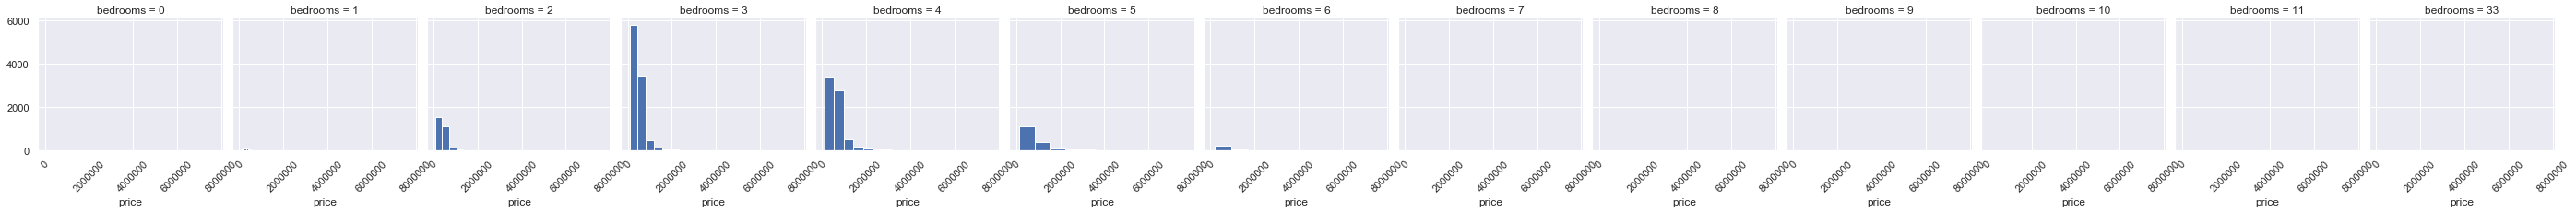

In [37]:
gx = sns.FacetGrid(housing_df, col='bedrooms')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
gx.fig.subplots_adjust(wspace=.05, hspace=.15)
#.set(xlim=(0, 5000000)).fig.subplots_adjust(wspace=.05, hspace=.05)

>> 1. Home purchases in King County have between 1 and 6 bathrooms.
>> 2. The most frequently constructed home has 3 bathrooms.
>> 3. Most commonly, homes purchased had between 2 and 5 bothrooms.

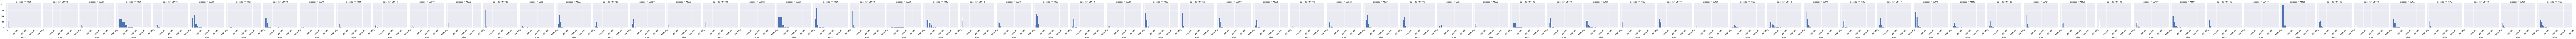

In [38]:
gx = sns.FacetGrid(housing_df, col='zipcode')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
gx.fig.subplots_adjust(wspace=.05, hspace=.05)
#.set(xlim=(0, 5000000)).fig.subplots_adjust(wspace=.05, hspace=.05)

>> 1. Overall, the zip codes of thos purchased homes in this dataset, are relatively evenly distrubuted.
>> 2. However, several of the zip codes have a much smaller frequency of home purchases. Perhaps this concerns those zip codes with island home purchases.

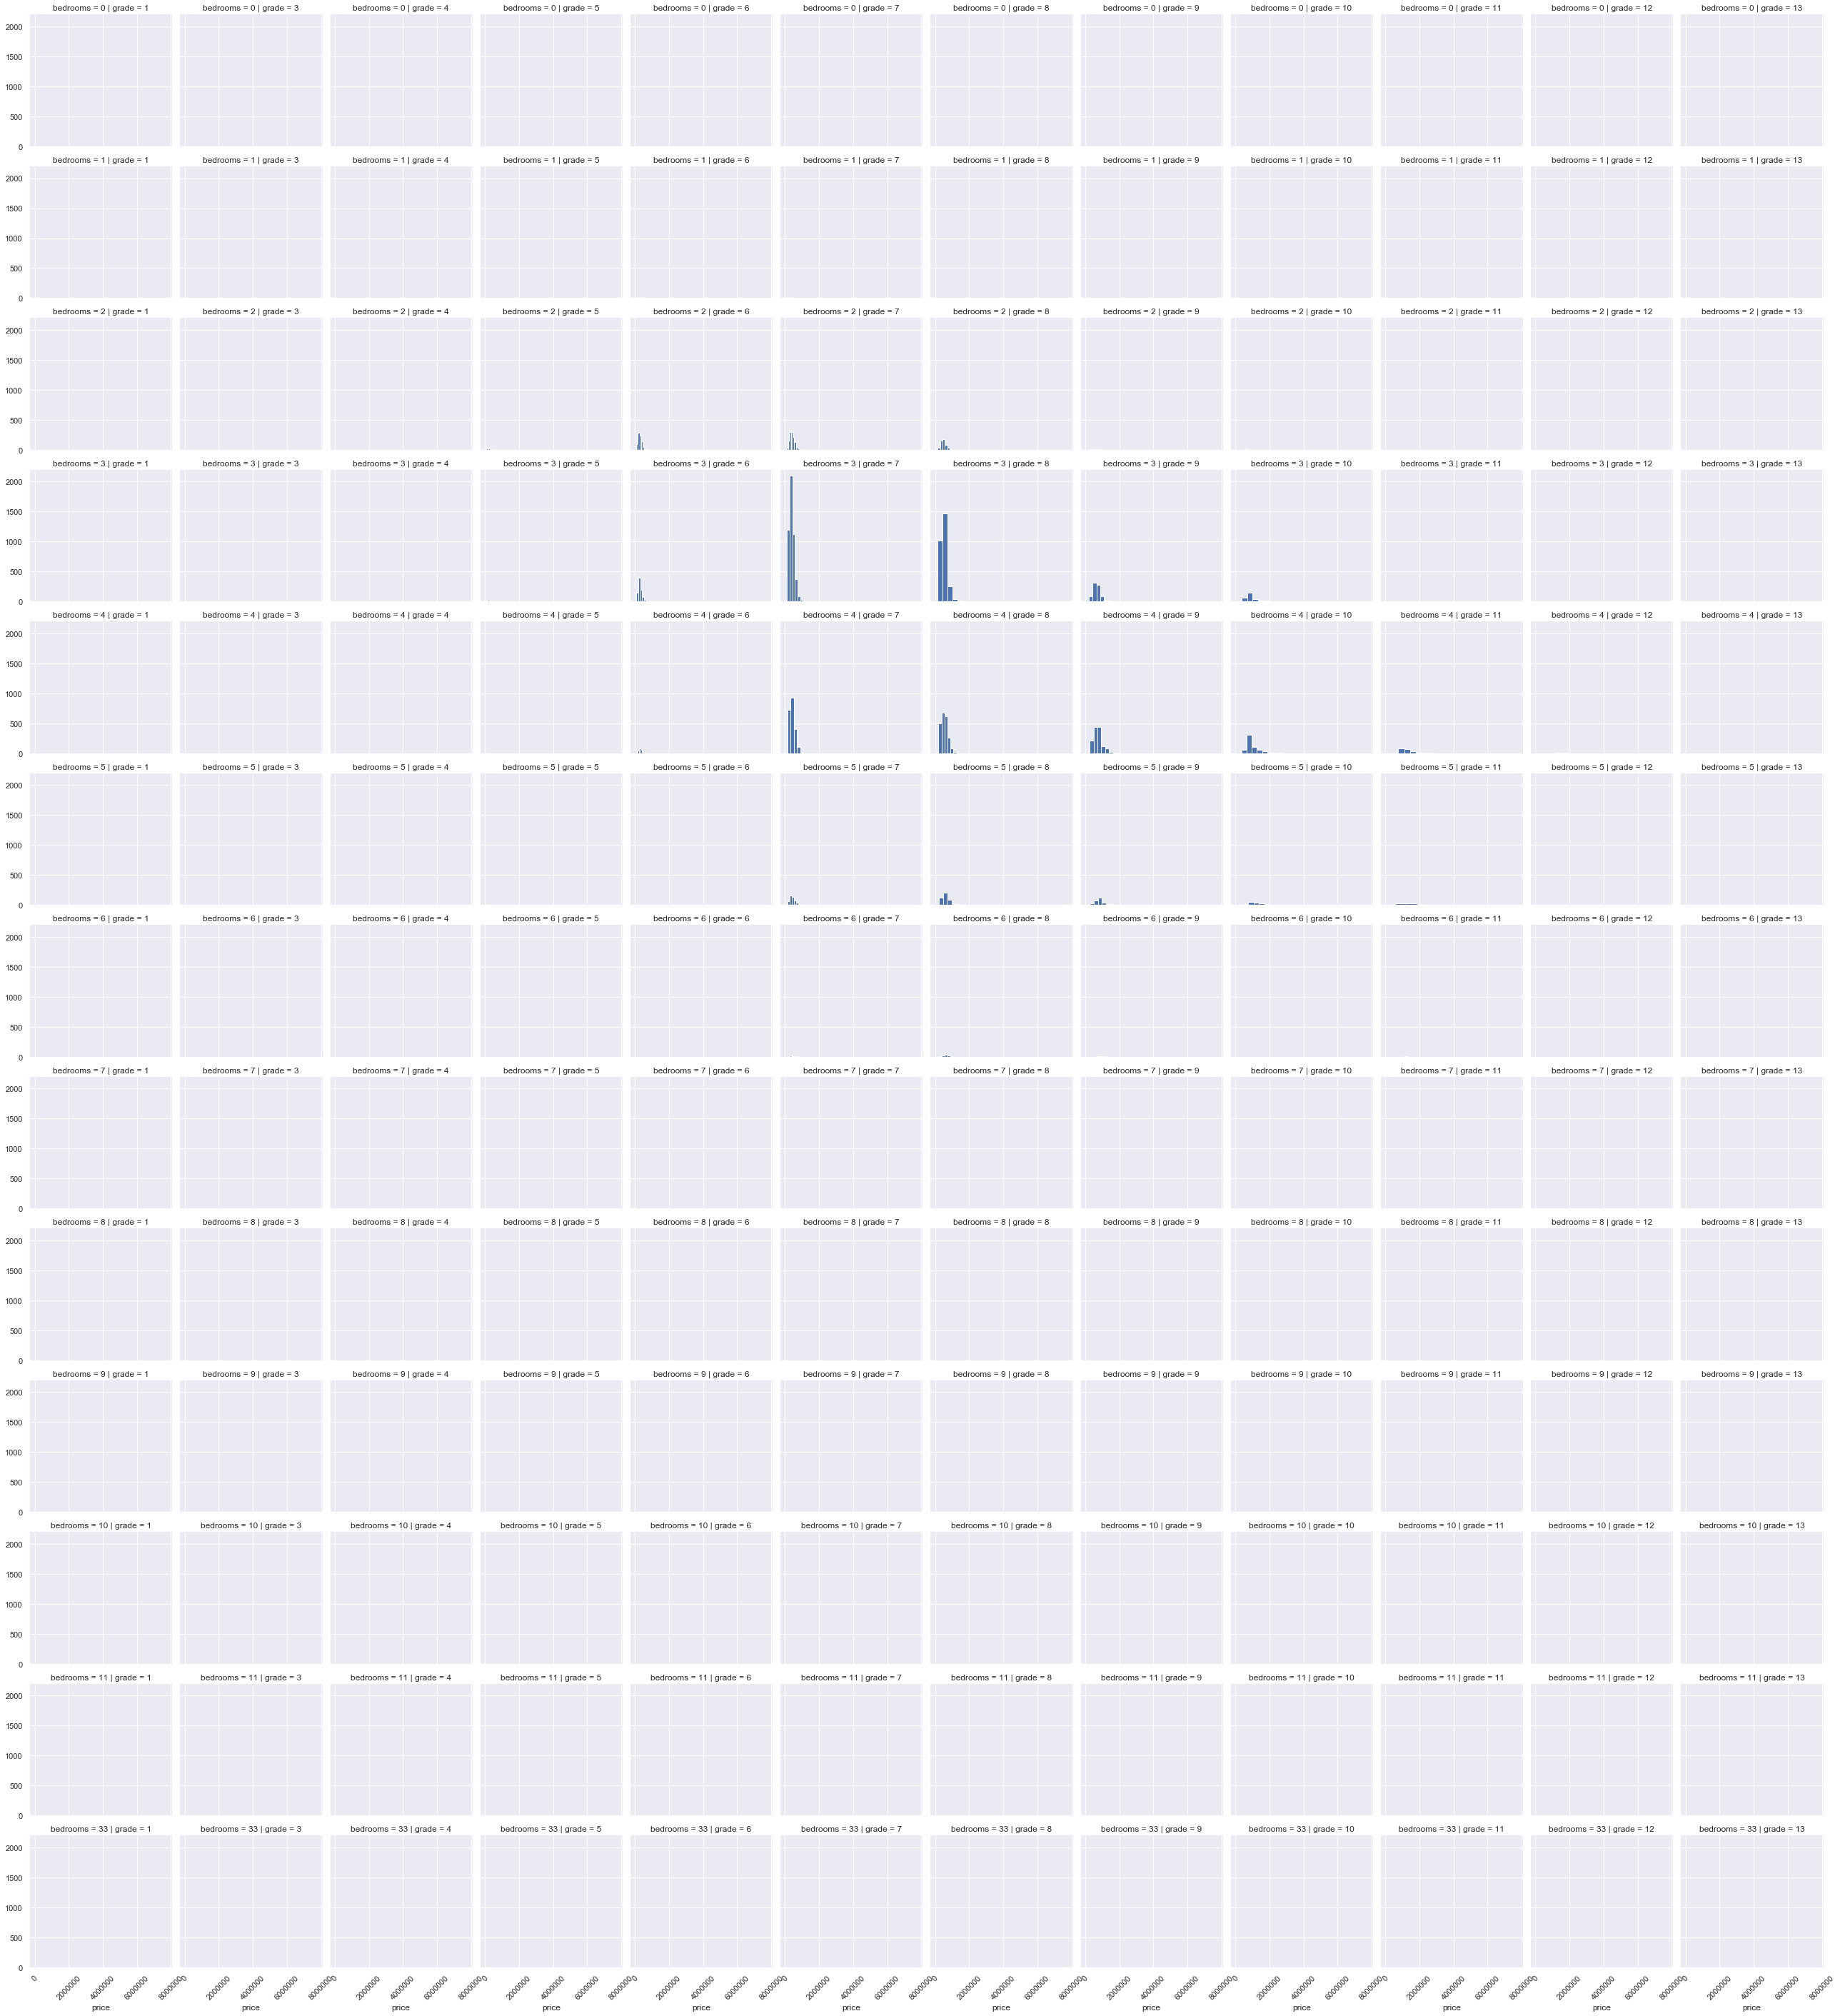

In [39]:
gx = sns.FacetGrid(housing_df, col='grade', row='bedrooms')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
gx.fig.subplots_adjust(wspace=.05, hspace=.15)

>> 1. The distributions between number of bedrooms and house grade are clustered in one central area of the above resulting plots.
>> 2. The population of distributions exist between 2 and 6 bedrooms, and between grades 5 and 12.
>> 3. The most frequently occurring distributions exist for homes with 3 bedrooms and a construction grade of either 7 or 8.

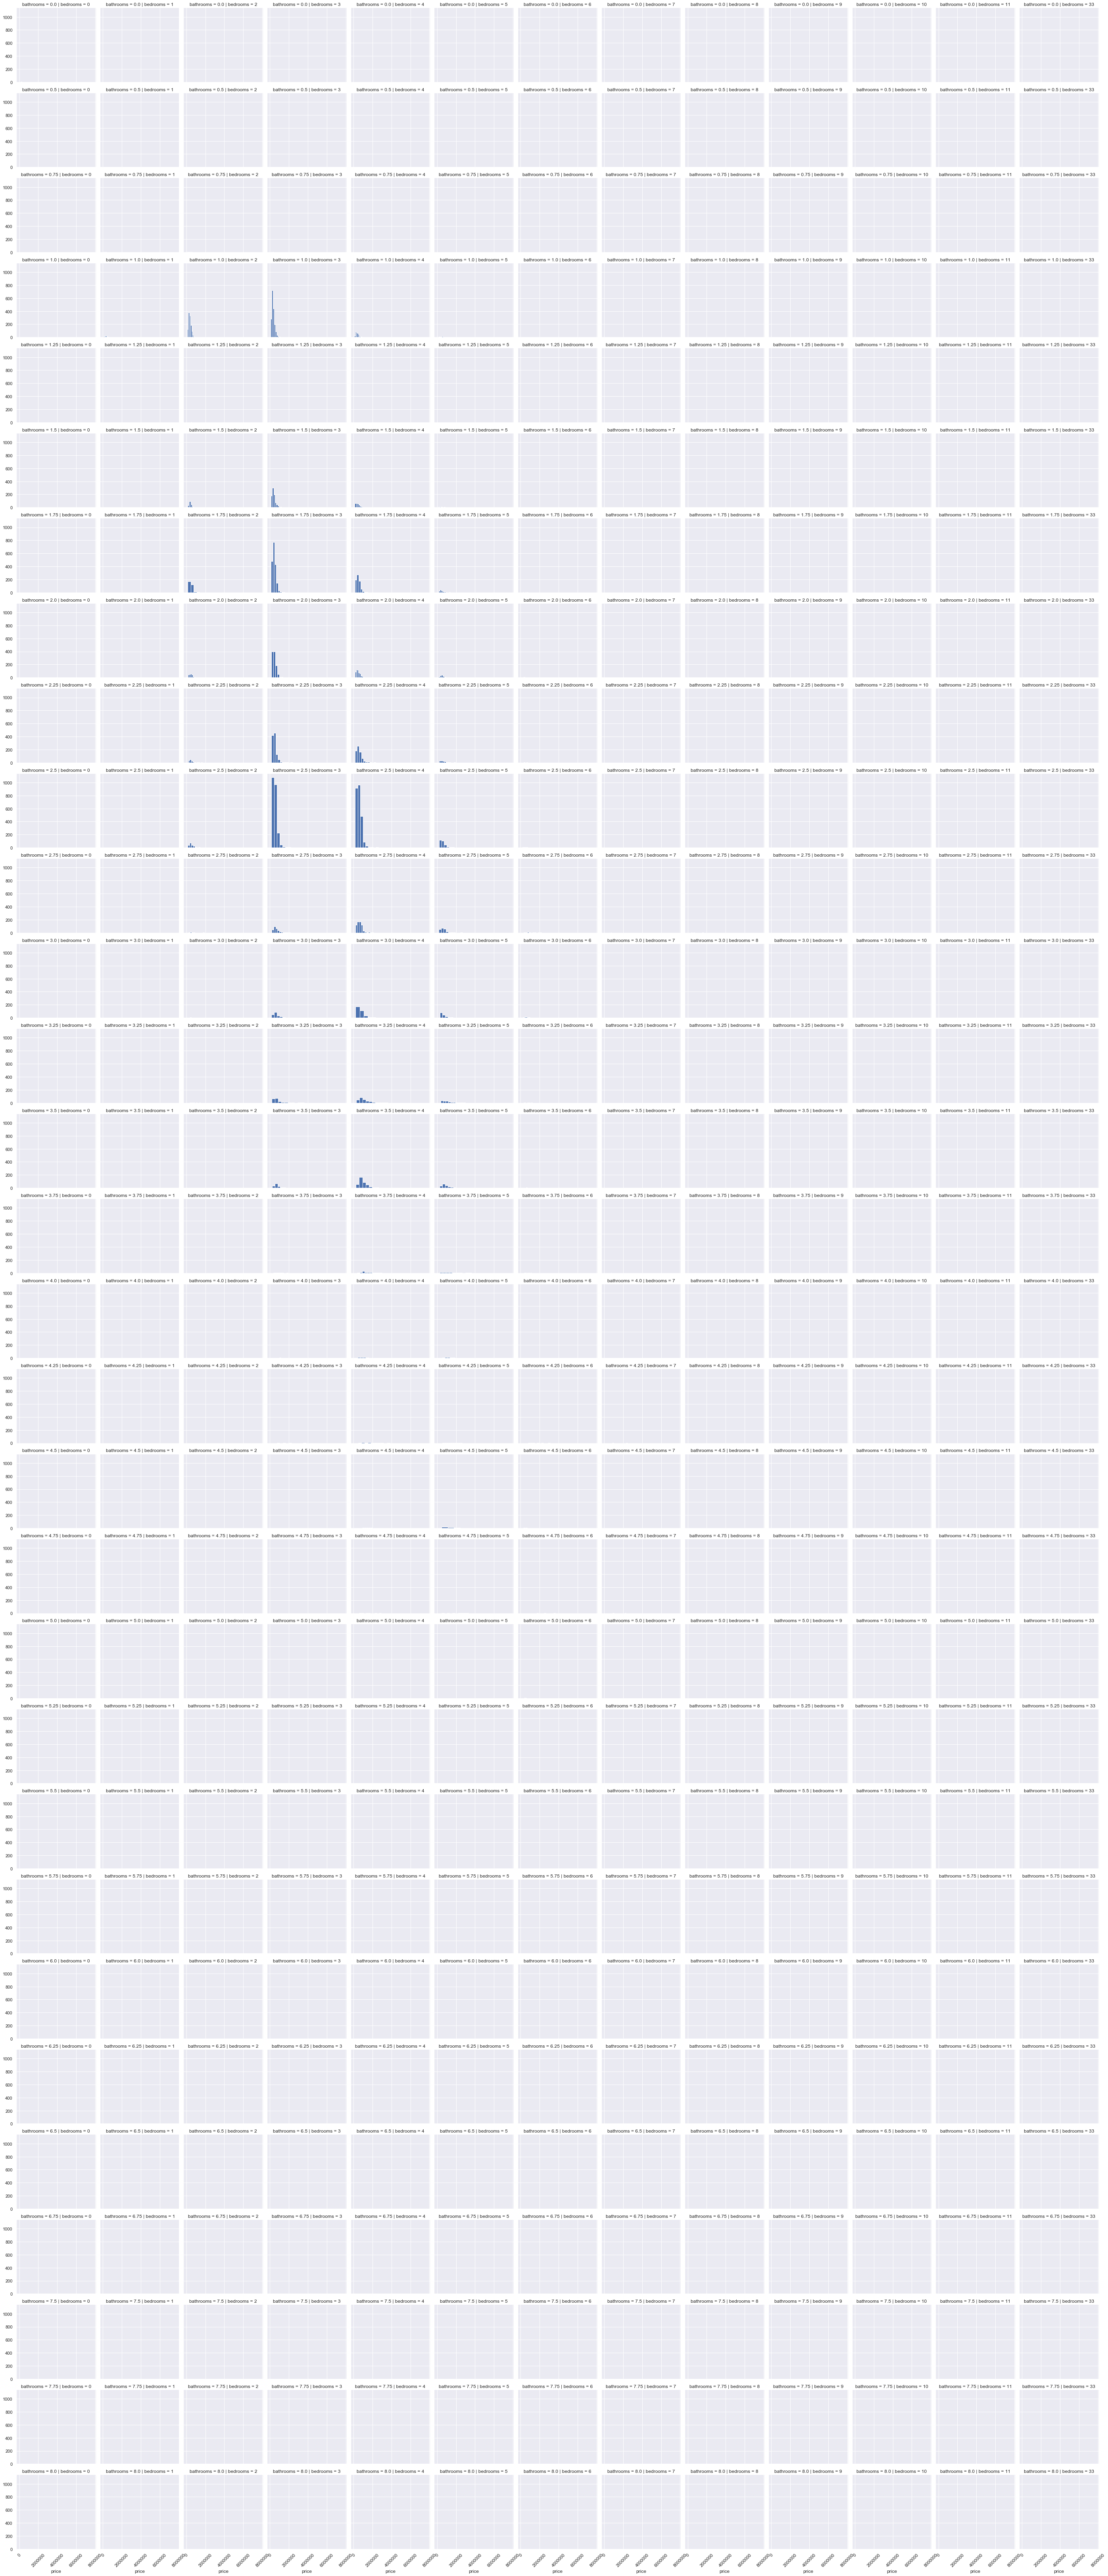

In [40]:
gx = sns.FacetGrid(housing_df, col='bedrooms', row='bathrooms')
gx = gx.map(plt.hist, 'price')
loc, labels = plt.xticks()
gx.set_xticklabels(labels, rotation=45)
gx.fig.subplots_adjust(wspace=.05, hspace=.15)

>> 1. The plots show 2 seperate clusters of distribution.
>> 2. The smaller cluster contains distributions for those home purchases that have 1 bathrooms and between 1 and 5 bedrooms.
>> 3. The second larger cluster of distributions contains home purchases that are constructed with between 1.5 and 4.5 bathrooms, and between 1 and 6 bedrooms.
>> 4. The frequencies of most occurance exist for construction of homes purchased that have between 1.75 and 2.5 bathrooms and between 3 and 4 bedrooms.
>> 5. The frequency of highest occurance for the smaller cluster of distibutions is 1 bathroom and 3 bedrooms.

Text(0.5, 1, 'House Purchase Log_Price vs. Total Living Space Area\n with Zip Code by color')

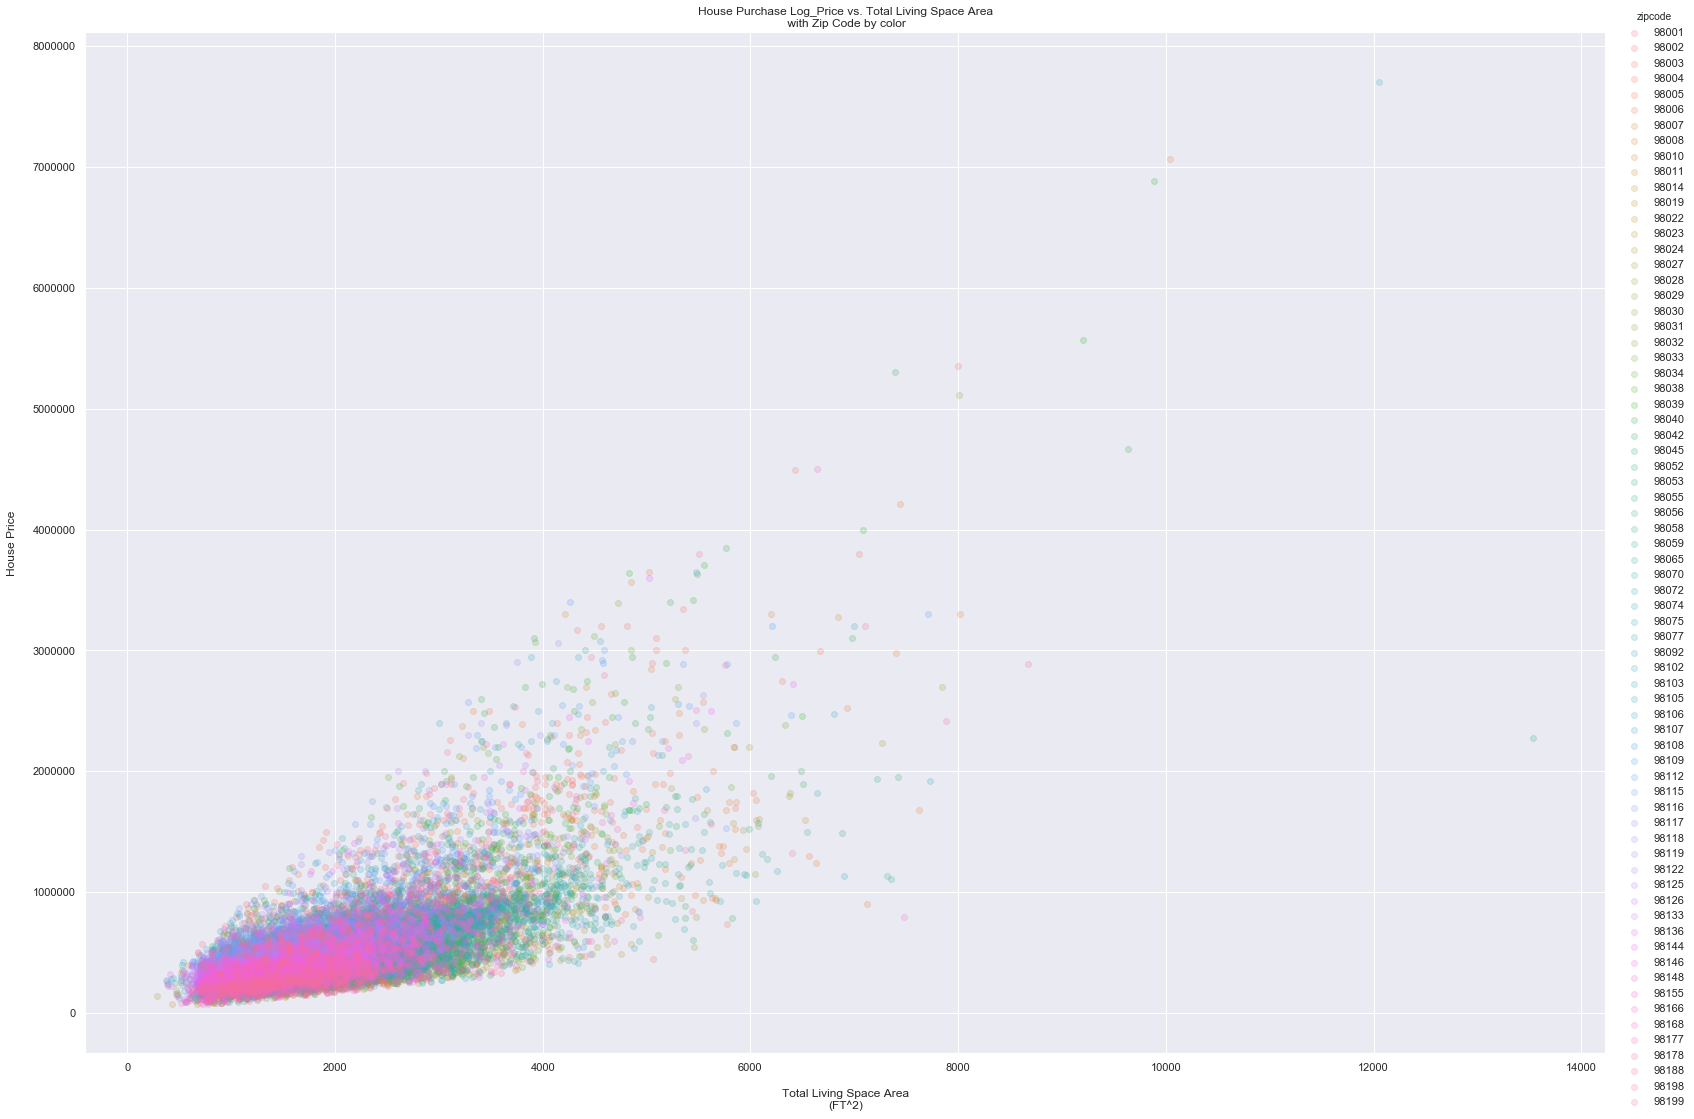

In [43]:
sns.lmplot(x = 'sqft_living', y = 'price', 
           data = housing_df,
           height=15, aspect=1.5,
           hue = 'zipcode', 
           palette='husl', 
           scatter_kws={'alpha':0.2},
           fit_reg = False)
plt.xlabel('\nTotal Living Space Area\n(FT^2)')
plt.ylabel('House Price\n')
plt.title('House Purchase Log_Price vs. Total Living Space Area\n with Zip Code by color')

>> 1. The resulting scatter plot results in those zip codes of purchased homes compard with total square footage of the living space.
>> 2. The higher number zip codes span a living space of between ~1,000 to ~3,000 square feet, costing typically less than 1-million dollars.
>> 3. Although the distribution of zip codea to square feet is spread out for most of the remaining home purchases, the middle numbered zip codes appear to have larger square feet of living space, where the purchase price is likewise increased.

Text(0.5, 1, 'House Purchase Price vs. Waterfront Property\n with House View by color')

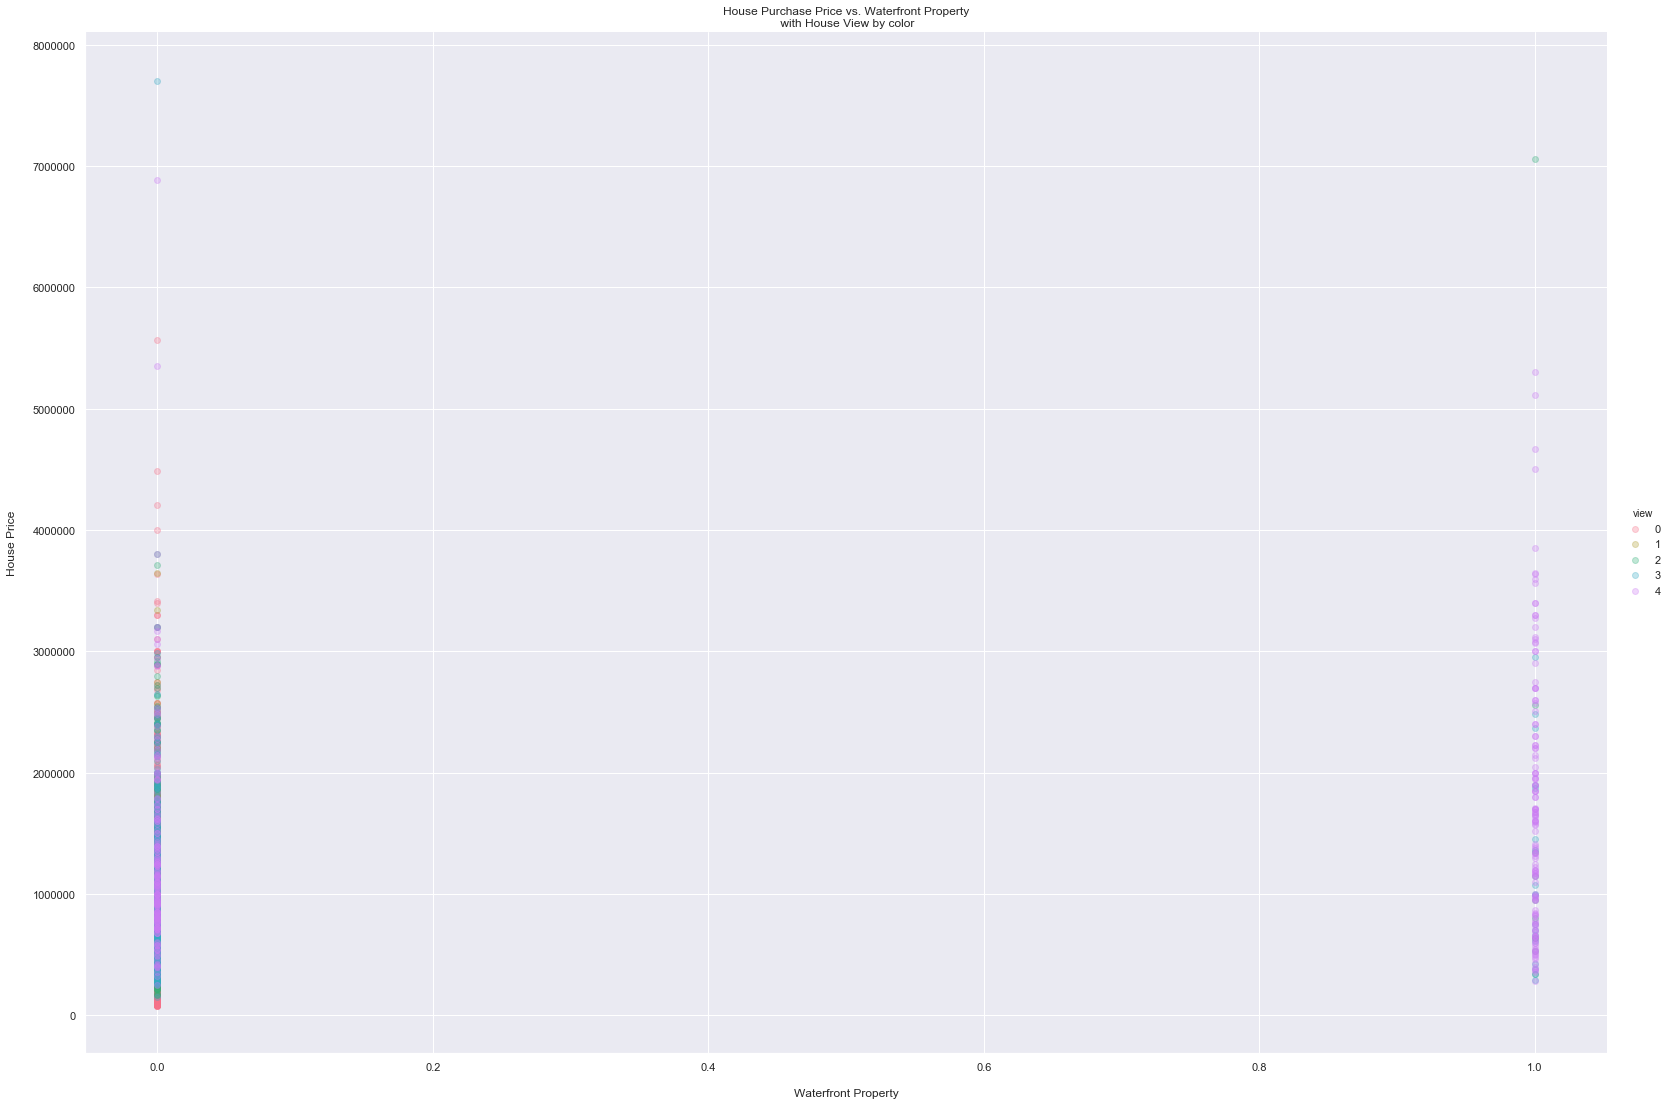

In [44]:
sns.lmplot(x = 'waterfront', y = 'price', 
           data = housing_df,
           height=15, aspect=1.5,
           hue = 'view', 
           palette="husl", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('\nWaterfront Property')
plt.ylabel('House Price\n')
plt.title('House Purchase Price vs. Waterfront Property\n with House View by color')

>> 1. Primarily, this scatterplot shows if a home purchase was a waterfront property or not, and how many views the home has.
>> 2. The waterfront homes have a view, while initially costing more to purchase.
>> 3. The most costly home to purchase has 3 views, but is not a waterfront purchase.
>> 4. The least costly home to purchase has no view, and is not waterfront property.

Text(0.5, 1, 'House Purchase Price vs. House Condition\n with House View by color')

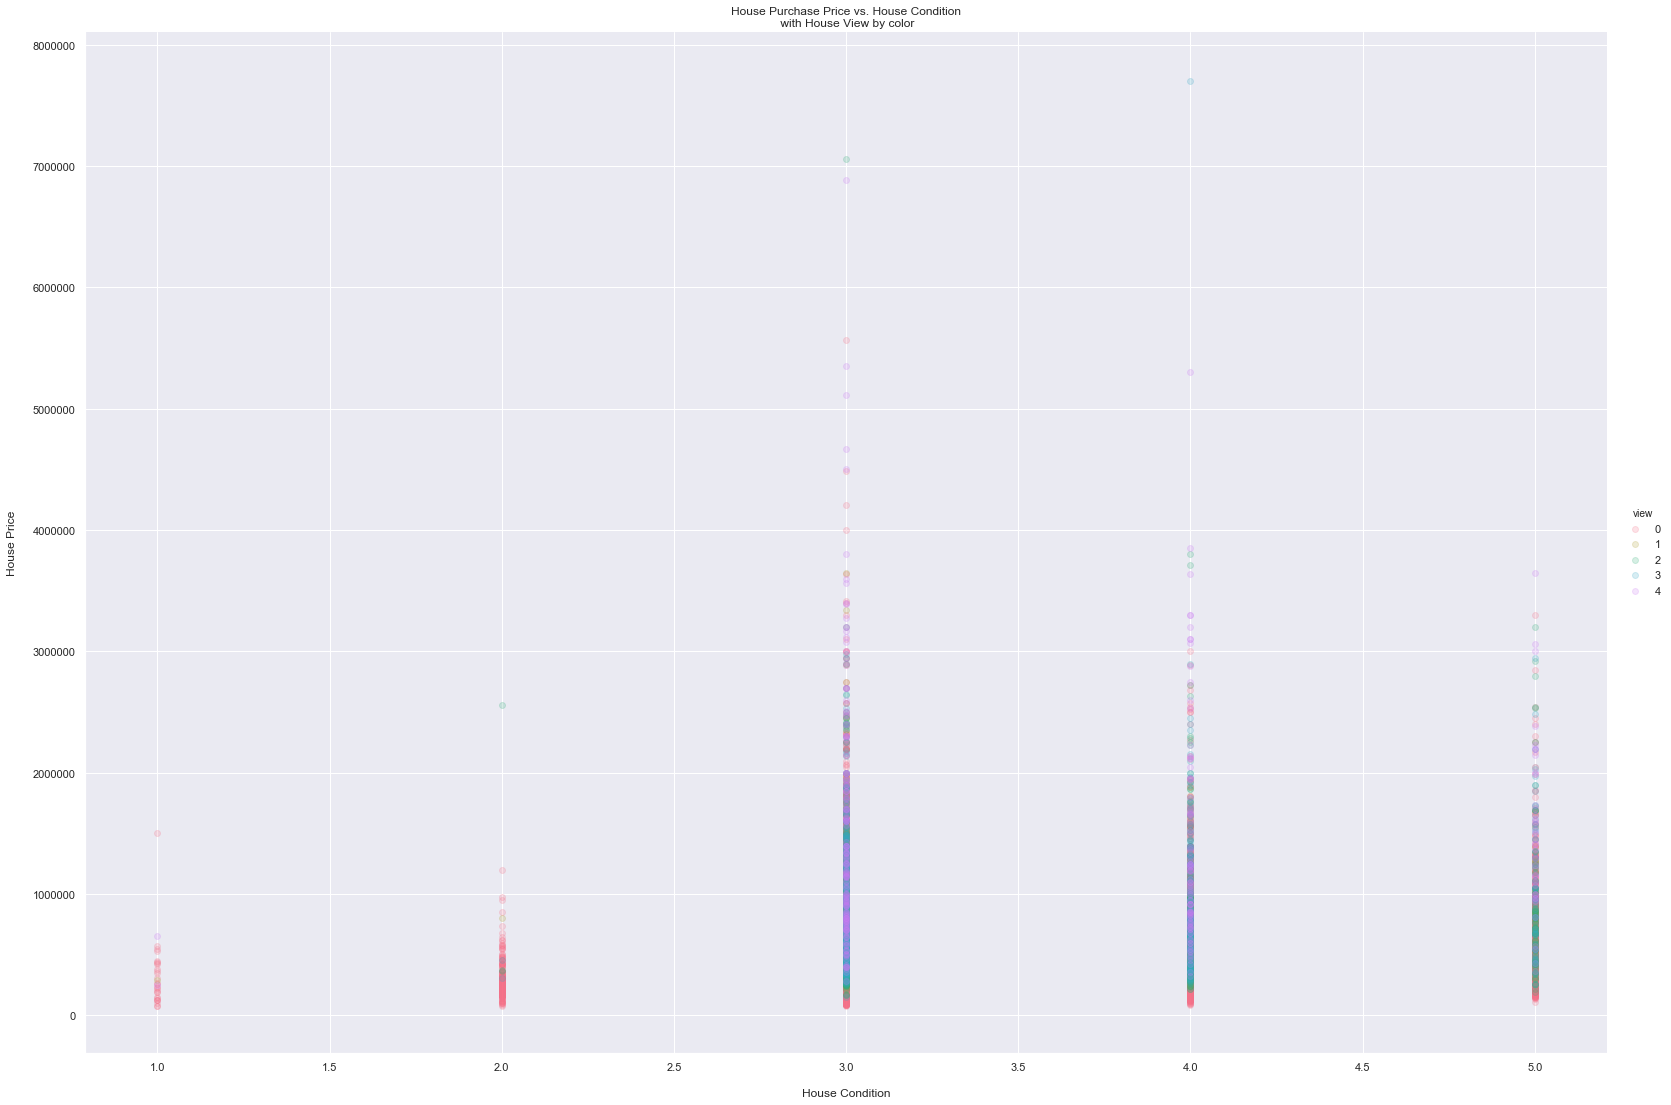

In [45]:
sns.lmplot(x = 'condition', y = 'price', 
           data = housing_df,
           height=15, aspect=1.5,
           hue = 'view', 
           palette="husl", 
           scatter_kws={'alpha':0.2},
           fit_reg = False)
plt.xlabel('\nHouse Condition')
plt.ylabel('House Price\n')
plt.title('House Purchase Price vs. House Condition\n with House View by color')

>> 1. The condition of a house with no view is identified across all condition ratings.
>> 2. However, in general for conditions 1 and 2, these home purchases consist primarily of properties without a view.
>> 3. The home purchases with condition ratings of either 1 or 2 also cost the least, where condition rating 3 has the largest spread of purchase price.

Text(0.5, 1, 'House Purchase Price vs. Purchase Date\n with House Score by color')

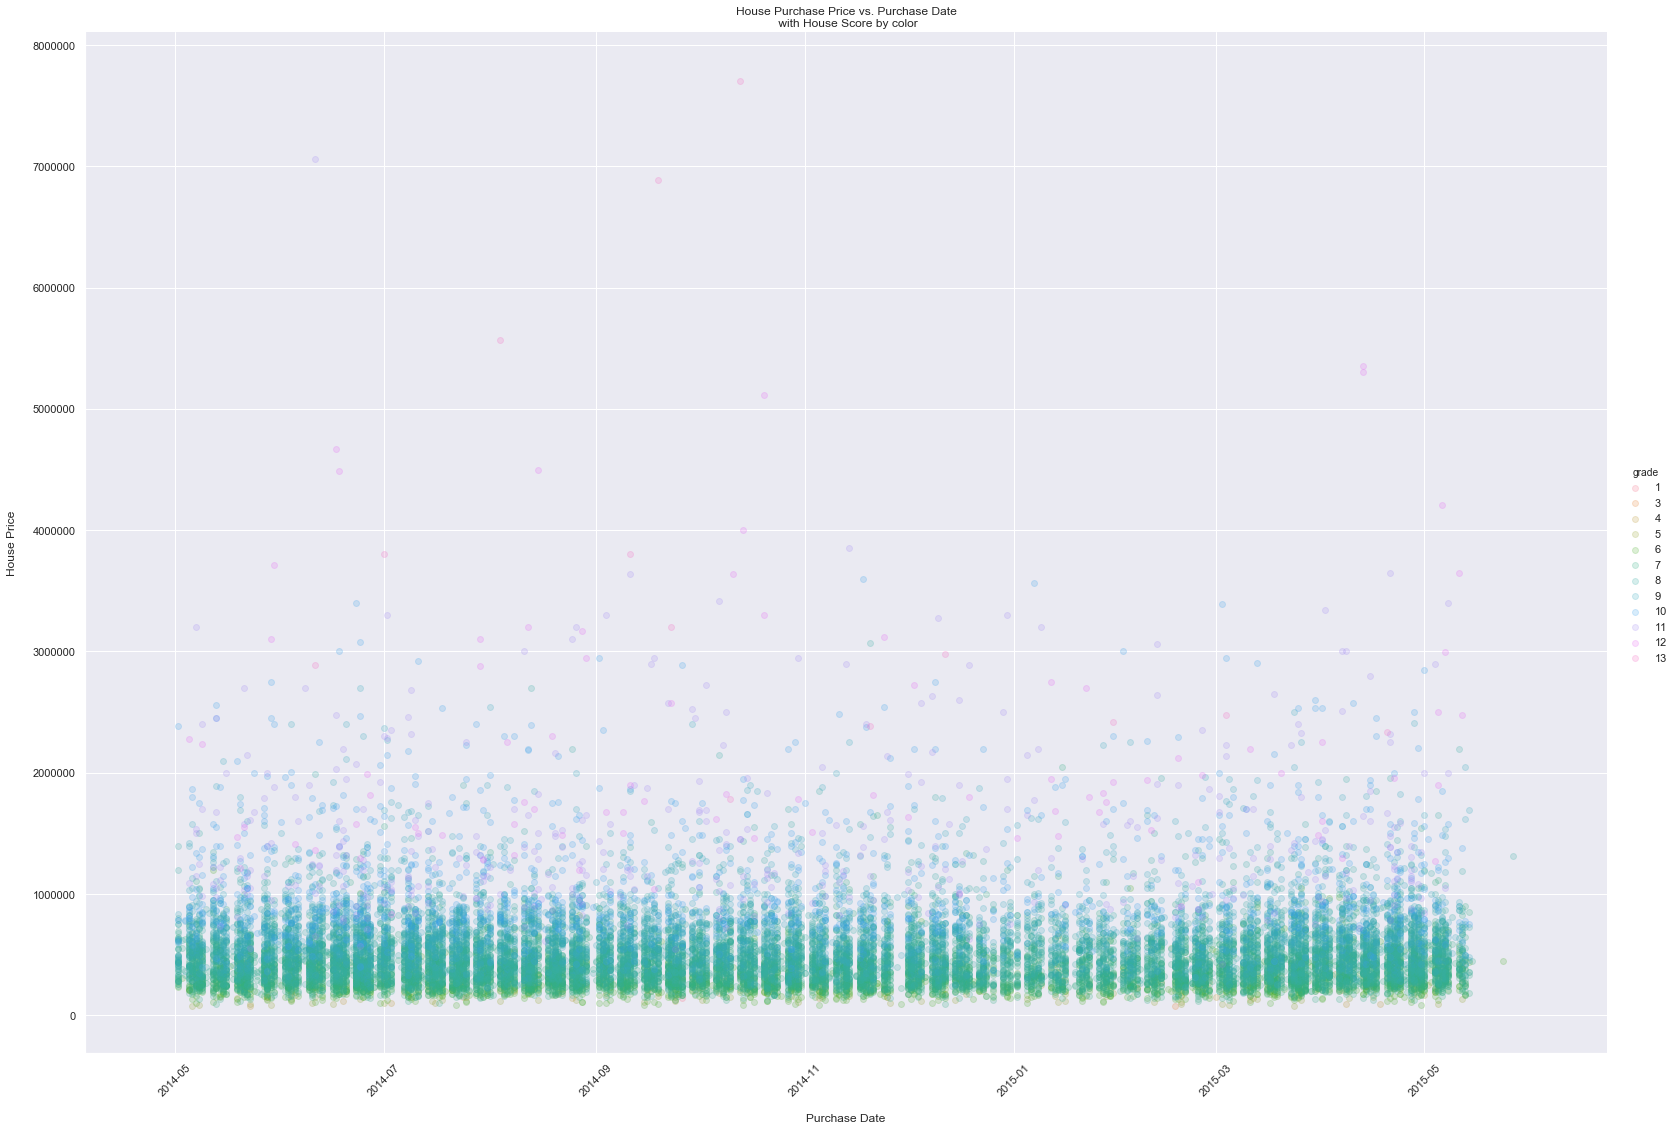

In [46]:
housing_df.sort_values(by='date',ascending=True, inplace=True)
sns.lmplot(x = 'date', y = 'price', 
           data = housing_df,
           height=15, aspect=1.5,
           hue = 'grade', 
           palette="husl", 
           scatter_kws={'alpha':0.2},
           fit_reg = False)
plt.xticks(rotation=45)
plt.xlabel('\nPurchase Date')
plt.ylabel('House Price\n')
plt.title('House Purchase Price vs. Purchase Date\n with House Score by color')

>> 1. Home sales across the dataset, reflect a cyclic nature, showing that periodic gaps in sales exist.  
      These cycles may reflect mortgage bank closures during weekends and holidays.
>> 2. The homes with views cost more.

> ### Hexbin Plots

Text(0.5, 0, '\nTotal Living Space')

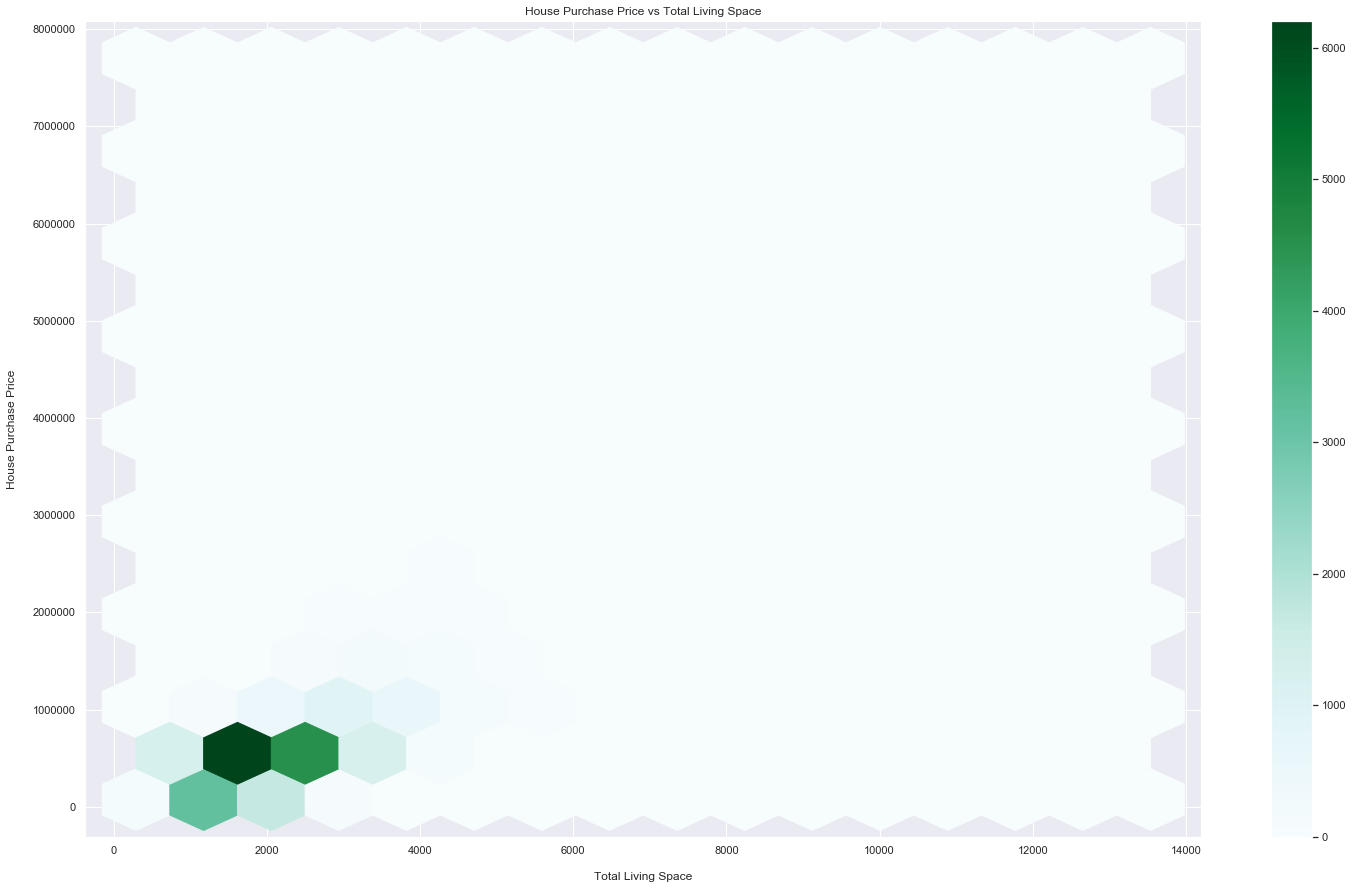

In [48]:
# Reset the theme to this notebook parameters
# updateTheme(figArea)
ax = plt.figure(figsize=figArea).gca() # define axis
housing_df.plot.hexbin(x = 'sqft_living', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Purchase Price vs Total Living Space') # Give the plot a main title
ax.set_ylabel('House Purchase Price\n')# Set text for y axis
ax.set_xlabel('\nTotal Living Space')

>> 1. The total living space of the purchased homes, is typically near 2,000 square feet.

Text(0.5, 0, '\nHouse Score')

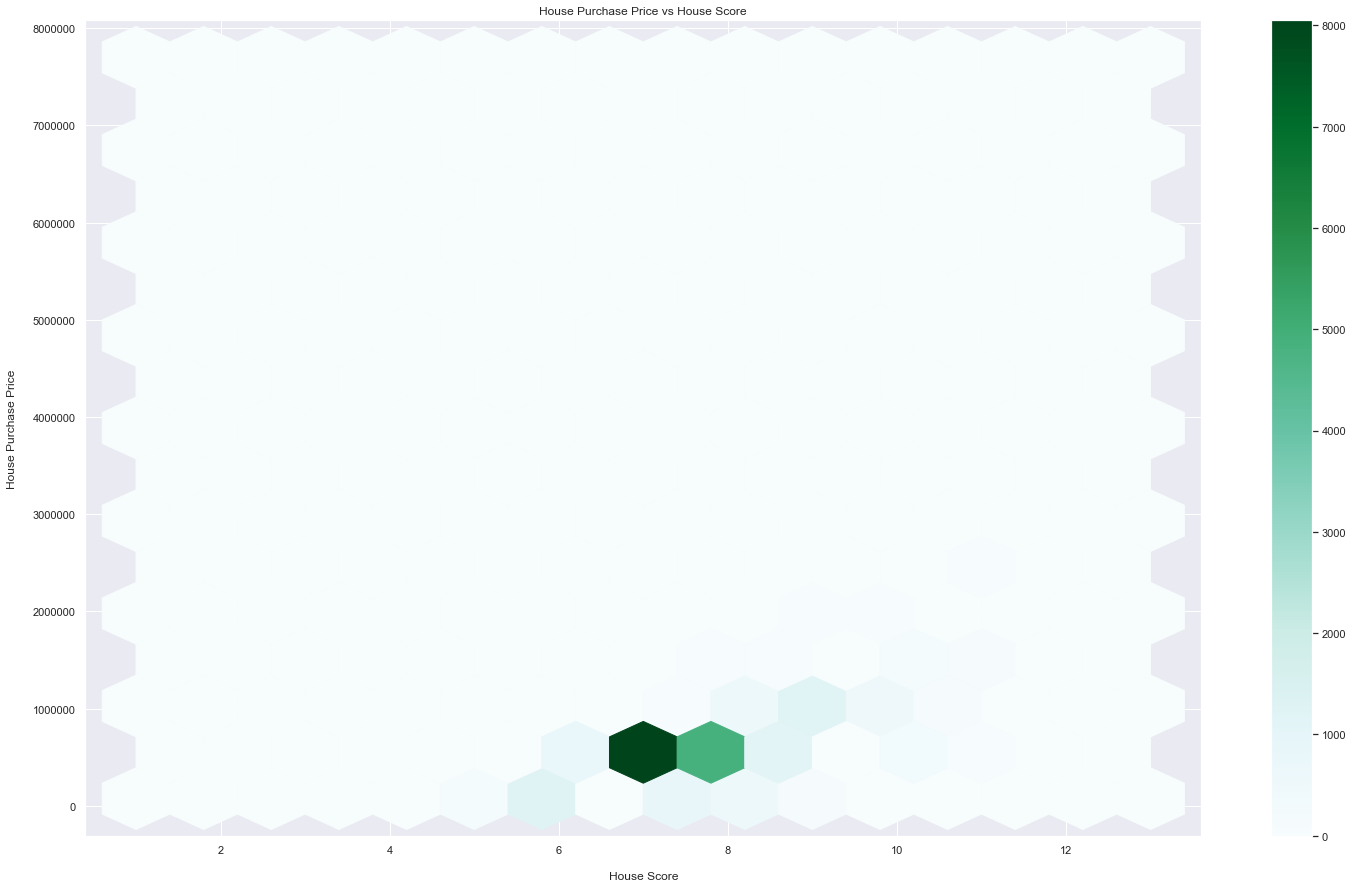

In [49]:
ax = plt.figure(figsize=figArea).gca() # define axis
housing_df.plot.hexbin(x = 'grade', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Purchase Price vs House Score') # Give the plot a main title
ax.set_ylabel('House Purchase Price\n')# Set text for y axis
ax.set_xlabel('\nHouse Score')

>> 1. The grade (score) of the homes are overall, rated at between 7 and 8.

Text(0.5, 0, '\nHouse Condition')

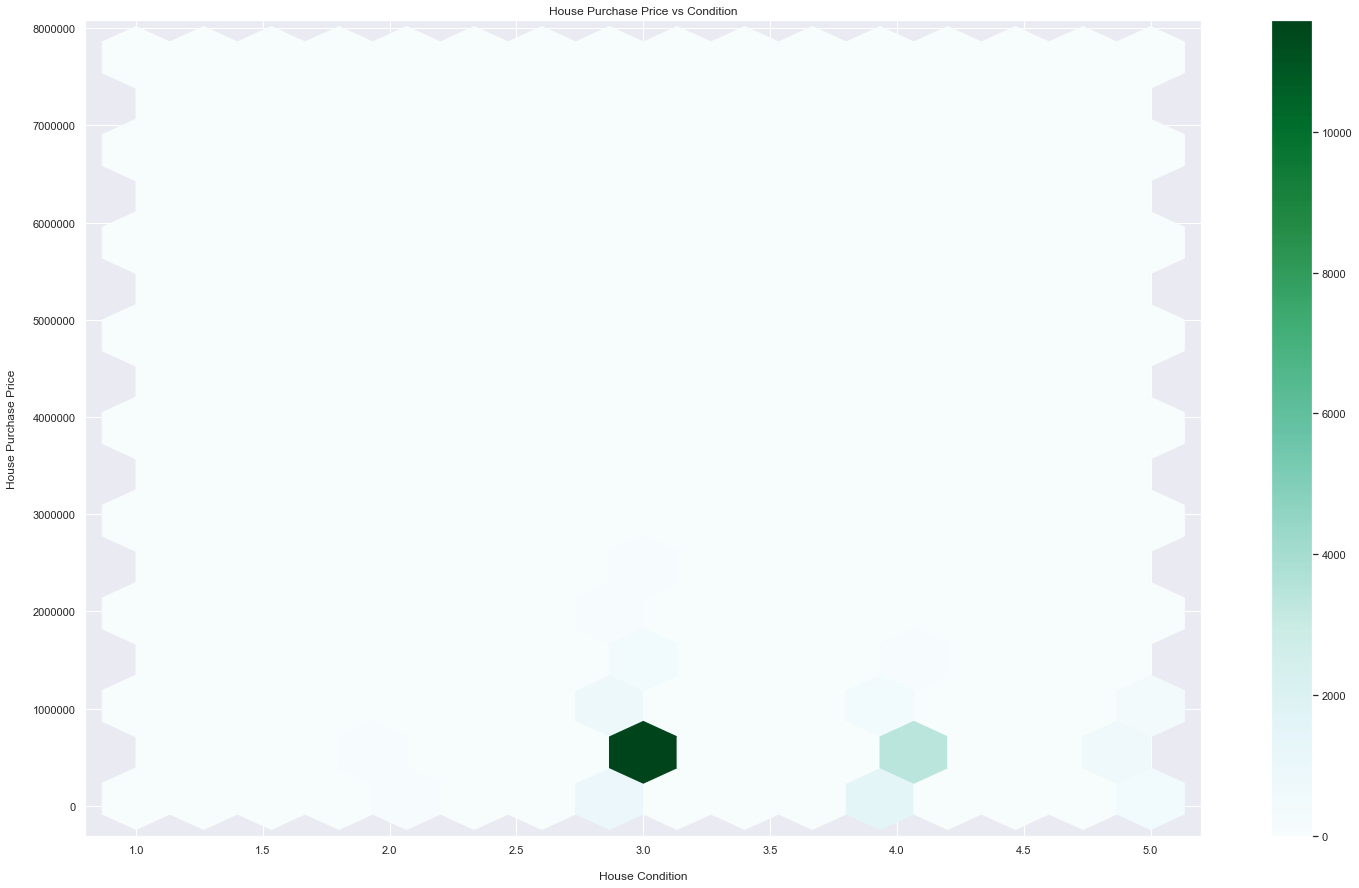

In [50]:
ax = plt.figure(figsize=figArea).gca() # define axis
housing_df.plot.hexbin(x = 'condition', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Purchase Price vs Condition') # Give the plot a main title
ax.set_ylabel('House Purchase Price\n')# Set text for y axis
ax.set_xlabel('\nHouse Condition')

>> 1. Home conditions are typically rated at 3, and with decreasing frequency, are also rated at 4 and 5, in decreasing frequency.

Text(0.5, 0, '\nYear Built')

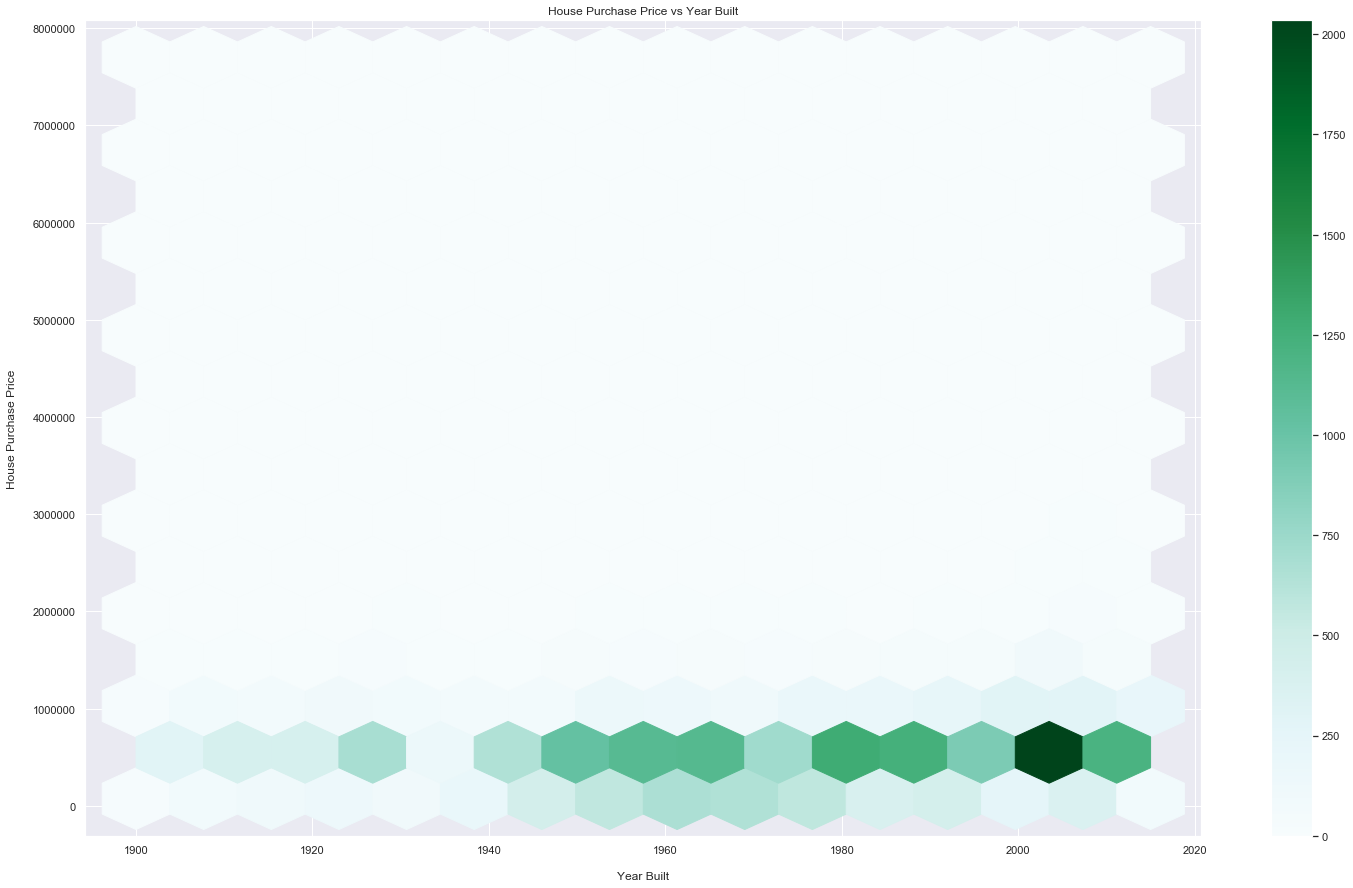

In [51]:
ax = plt.figure(figsize=figArea).gca() # define axis
housing_df.plot.hexbin(x = 'yr_built', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Purchase Price vs Year Built') # Give the plot a main title
ax.set_ylabel('House Purchase Price\n')# Set text for y axis
ax.set_xlabel('\nYear Built')

>> 1. The majority of homes are built after the year 2000, but span overall, from the year 1940 onward.

Text(0.5, 0, '\nYear Renovated')

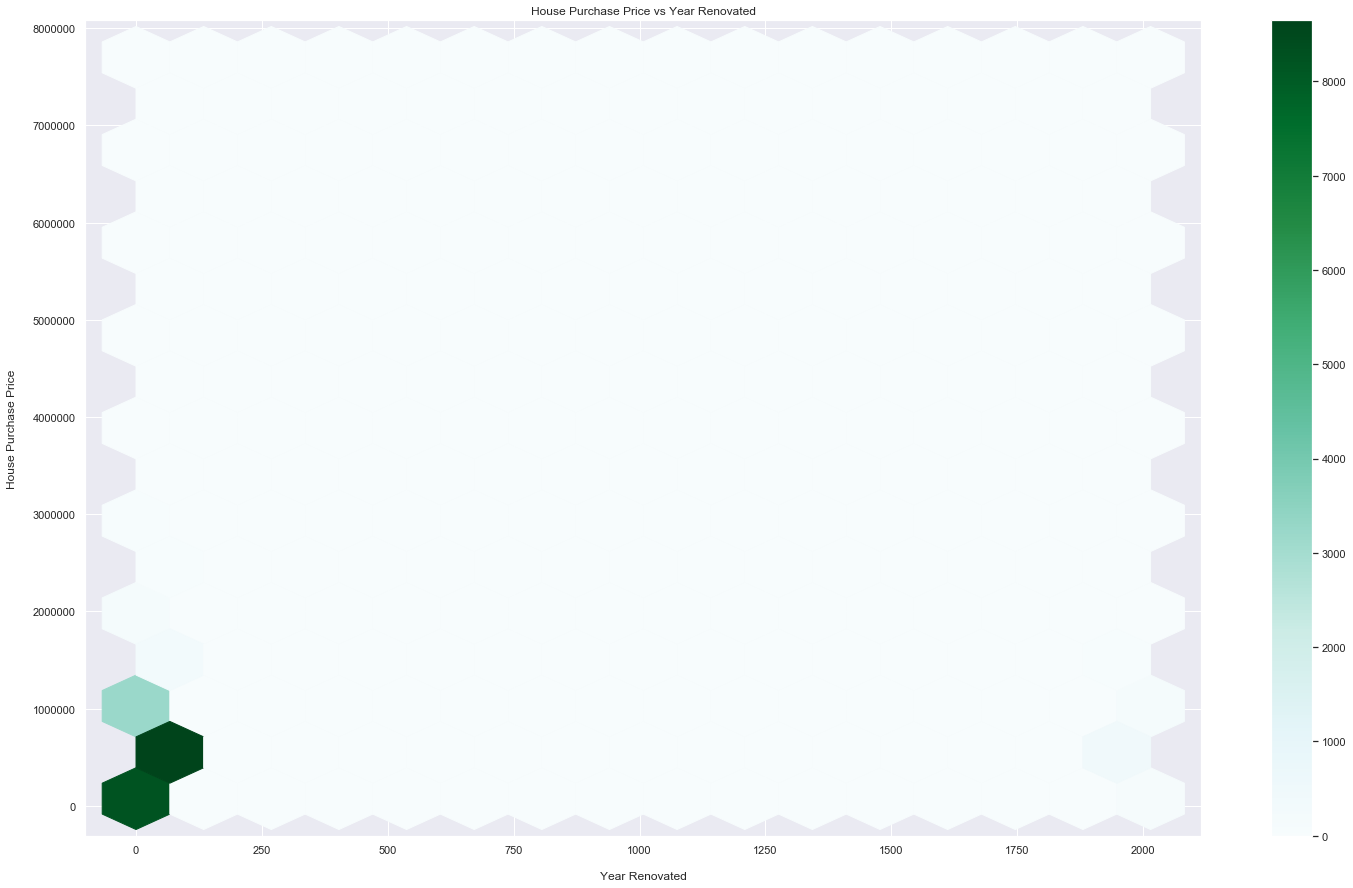

In [52]:
ax = plt.figure(figsize=figArea).gca() # define axis
housing_df.plot.hexbin(x = 'yr_renovated', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Purchase Price vs Year Renovated') # Give the plot a main title
ax.set_ylabel('House Purchase Price\n')# Set text for y axis
ax.set_xlabel('\nYear Renovated')

>> 1. The majority of homes are not renovated.

> ### Heatmap Plots

Text(0.5, 1.0, 'Price Ranges of Homes by Score')

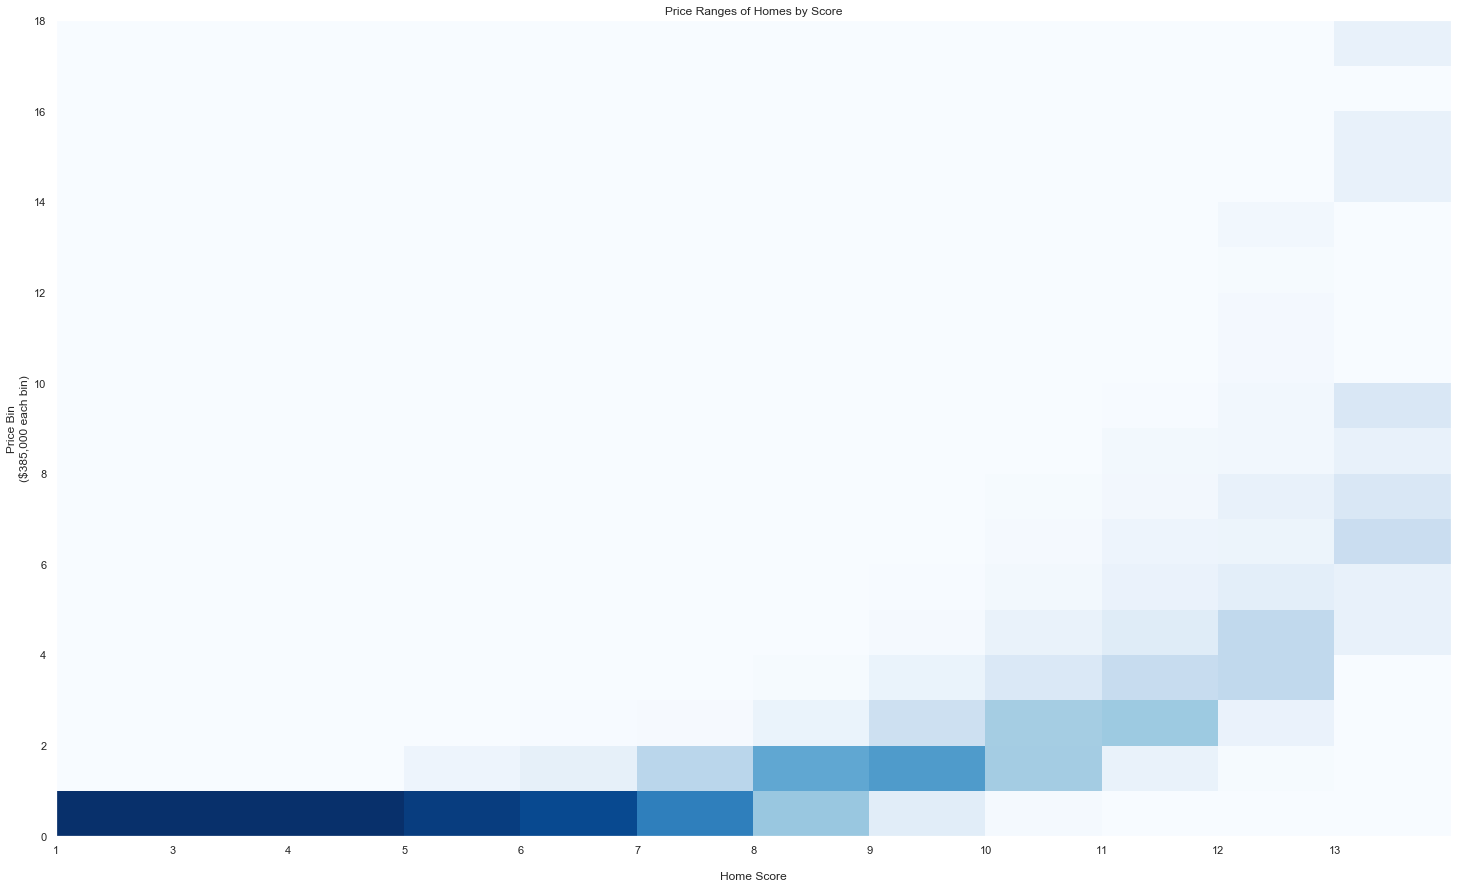

In [53]:
bins = 20
yLabel = (np.max(housing_df['price'])/bins).astype(int)
yLabel = f'{yLabel:,}'
housing_df.loc[:, 'price_bin'] = pd.cut(housing_df.loc[:, 'price'], bins=bins, labels = range(bins))
make_price = pd.crosstab(housing_df.loc[:, 'price_bin'], housing_df.loc[:, 'grade'])
num_homes = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_homes, axis = 1)
ax = plt.figure(figsize=figArea).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns)
ax.set_xlabel('\nHome Score')
ax.set_ylabel('Price Bin\n($' + yLabel + ' each bin)')
ax.set_title('Price Ranges of Homes by Score')

>> 1. The quality of home construction has a non-linear trend, with majority of purchases having a score of less than 8.

Text(0.5, 1.0, 'Price Ranges of Homes by Condition')

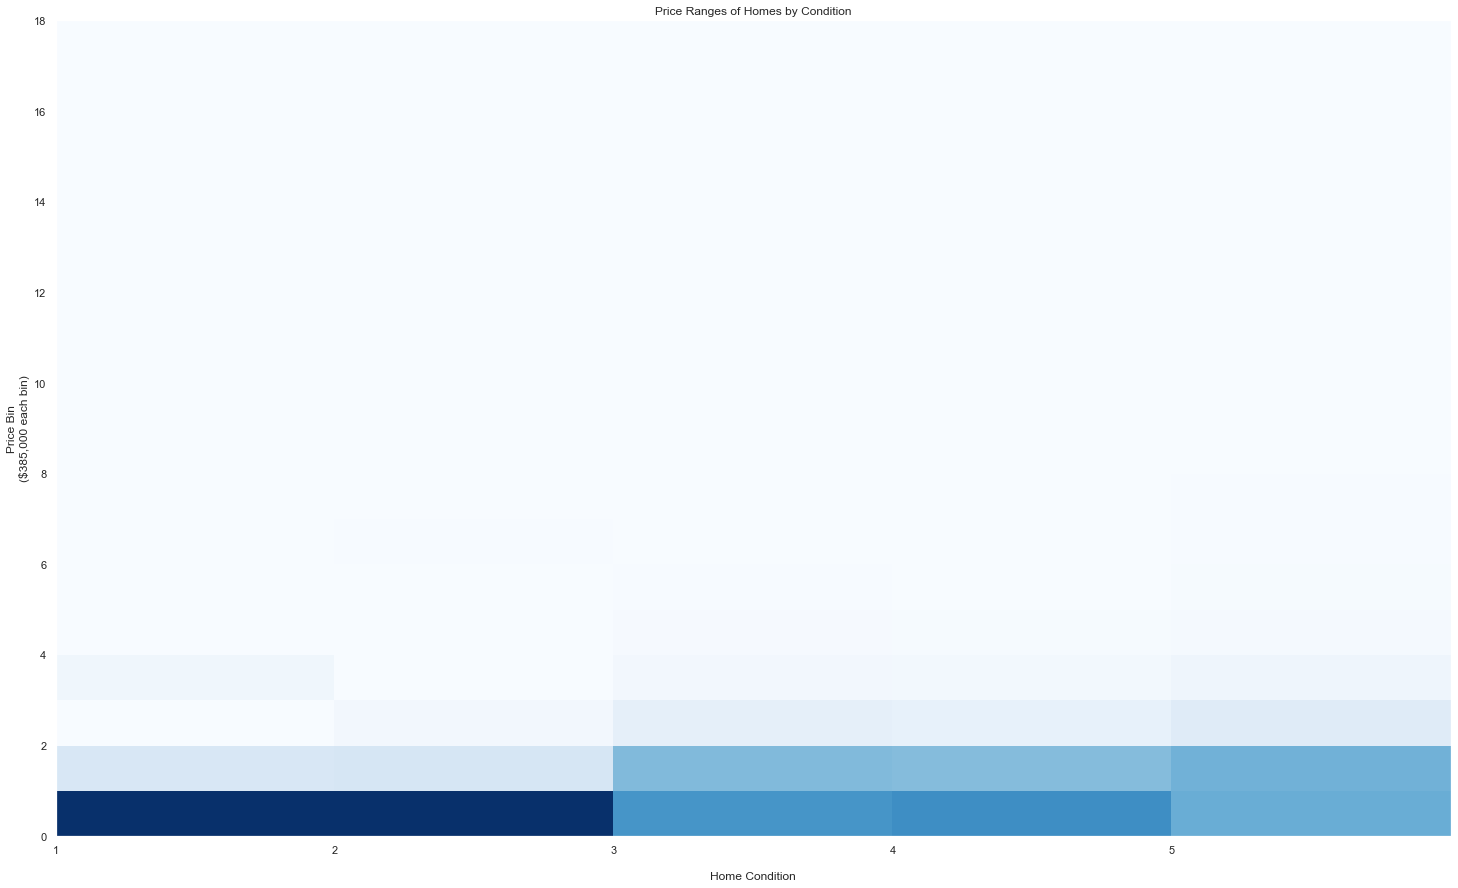

In [54]:
bins = 20
yLabel = (np.max(housing_df['price'])/bins).astype(int)
yLabel = f'{yLabel:,}'
housing_df.loc[:, 'price_bin'] = pd.cut(housing_df.loc[:, 'price'], bins=bins, labels = range(bins))
make_price = pd.crosstab(housing_df.loc[:, 'price_bin'], housing_df.loc[:, 'condition'])
num_homes = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_homes, axis = 1)
ax = plt.figure(figsize=figArea).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns)
ax.set_xlabel('\nHome Condition')
ax.set_ylabel('Price Bin\n($' + yLabel + ' each bin)')
ax.set_title('Price Ranges of Homes by Condition')

>> 1. The condition of most home purchases are between 1 and 3.

Text(0.5, 1.0, 'Price Ranges of Homes by Living Space')

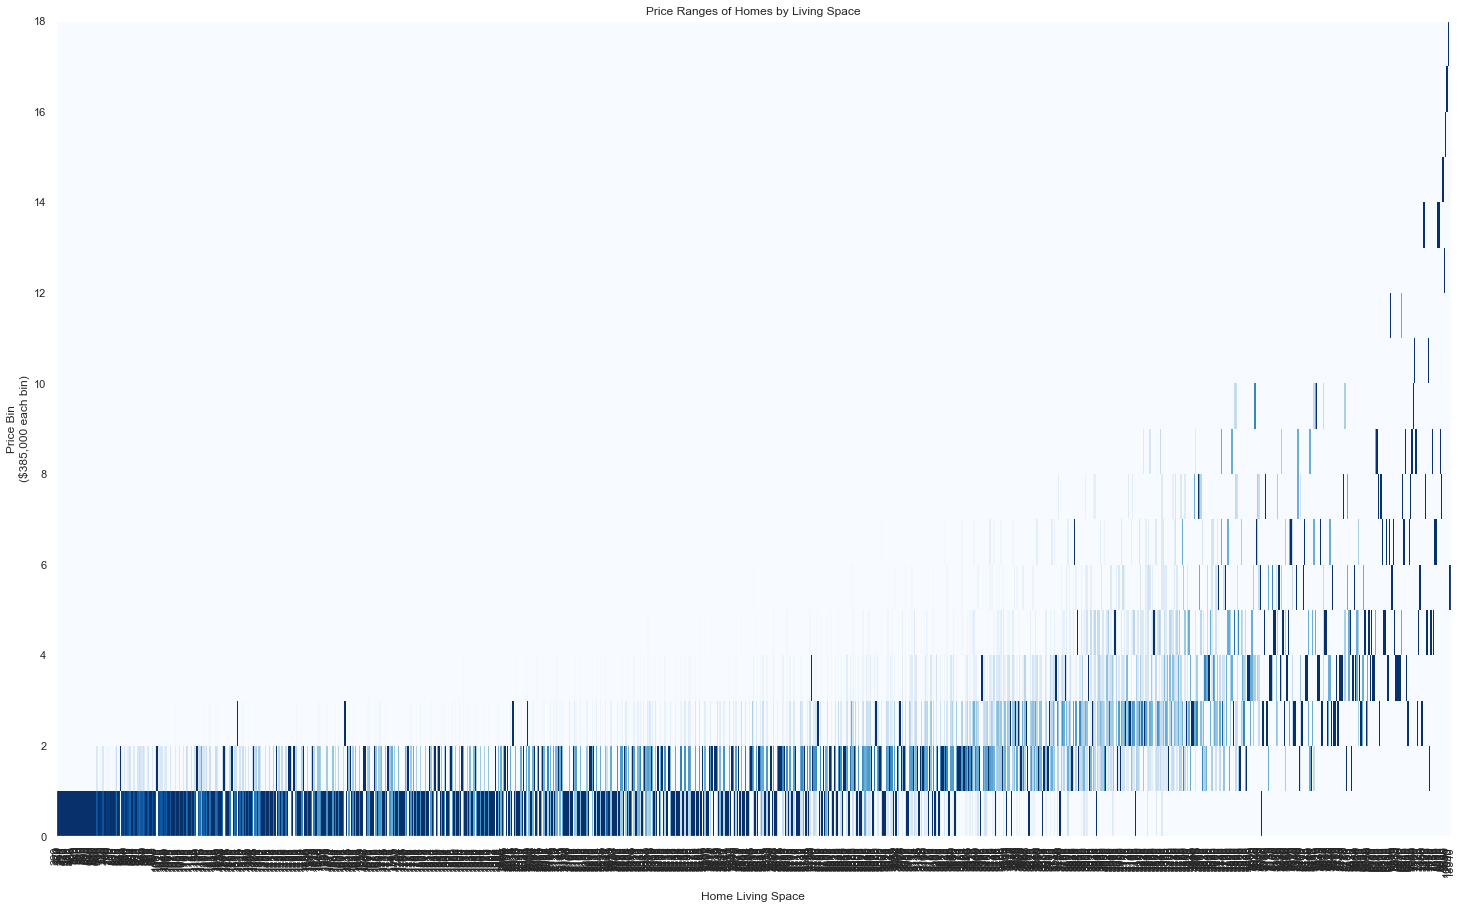

In [55]:
bins = 20
yLabel = (np.max(housing_df['price'])/bins).astype(int)
yLabel = f'{yLabel:,}'
housing_df.loc[:, 'price_bin'] = pd.cut(housing_df.loc[:, 'price'], bins=bins, labels = range(bins))
make_price = pd.crosstab(housing_df.loc[:, 'price_bin'], housing_df.loc[:, 'sqft_living'])
num_homes = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_homes, axis = 1)
ax = plt.figure(figsize=figArea).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns, rotation=90)
ax.set_xlabel('\nHome Living Space')
ax.set_ylabel('Price Bin\n($' + yLabel + ' each bin)')
ax.set_title('Price Ranges of Homes by Living Space')

>> 1. The square footage of living space increases the purchase price in a non-linear way.
>> 2. Compare this behavior with the KDE plot that reflects linear behavior.

In [ ]:
bins = 20
yLabel = (np.max(housing_df['price'])/bins).astype(int)
yLabel = f'{yLabel:,}'
housing_df.loc[:, 'price_bin'] = pd.cut(housing_df.loc[:, 'price'], bins=bins, labels = range(bins))
make_price = pd.crosstab(housing_df.loc[:, 'price_bin'], housing_df.loc[:, 'bedrooms'])
num_homes = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_homes, axis = 1)
ax = plt.figure(figsize=figArea).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns)
ax.set_xlabel('\nNumber of Bedrooms')
ax.set_ylabel('Price Bin\n($' + yLabel + ' each bin)')
ax.set_title('Price Ranges of Homes by Number of Bedrooms')

>> 1. The homes with the most bedrooms typically cost the most.
>> 2. The homes with between 4 and 8 bedrooms are clustered in approximately the same price category.

In [ ]:
bins = 20
yLabel = (np.max(housing_df['price'])/bins).astype(int)
yLabel = f'{yLabel:,}'
housing_df.loc[:, 'price_bin'] = pd.cut(housing_df.loc[:, 'price'], bins=bins, labels = range(bins))
make_price = pd.crosstab(housing_df.loc[:, 'price_bin'], housing_df.loc[:, 'bathrooms'])
num_homes = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_homes, axis = 1)
ax = plt.figure(figsize=figArea).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns, rotation=90)
ax.set_xlabel('\nNumber of Bathrooms')
ax.set_ylabel('Price Bin\n($' + yLabel + ' each bin)')
ax.set_title('Price Ranges of Homes by Number of Bathrooms')

>> 1. The highest home purchase prices are most commonly constructed with 7.5 to 7.75 bathrooms. 